<a href="https://www.kaggle.com/code/sebstutt/covid-19-on-digital-connectivity?scriptVersionId=152920589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Impact of COVID-19 on Digital Connectivity & Education Within the United States in 2020
## By Séb

## Project Introduction

The COVID-19 had a major impact on the worlwide structure and organization. During this Pandemic which started back at the real end of 2019 in the city of Wuhan and spreaded around the globe rapidly, states, institution, individual faced a major shift in their way of living and the unknown.
What started far away, for most of us landed in our homes and organization quicker than we thought.

The economy stand still for weeks, company organized their work forces in order to keep on going, implementing work time reduction, Home Office measure, following as good as they can the mandatory implementation from their states of Shelter@Home, trying to protect but keep on living.

Social life stand still as well, bars and restaurants closed one country after the other, reduction of social contacts were imposed among the one mentioned, school and educational were severly impacted and a new system needed to be invented and organized.

The educational structure in almost all countries in the world, based on a presential setup, needed to be organized digitaly in order to keep teaching to the youngest generation.

Within the following chapters, we will focus on the impact of the pandemic on the educational system in the USA for the young ones (PreK-12) and of course its impact on the digitalization landscape.

The data gathered will help us to try answer the following questions :
- What are the data available and what information can we take from it ?
- What is the picture of the digital connectivity and engagement in the USA for 2020 ?
- How does student engagement with different types of eductional technology change over the course of the pandemic ?
- How does student engagement with online learning platforms relate to different geography, demographic contect (e.g Race, Ethnicity)

## Information about the Data 

Our analyze, based on US district information accross the United States gathered the information which should help us to answer these question
These Data were collected from different sources which can be found below :
- Engagement Data based on the "LearnPlatform": Collecting page load events of over 10k education technology products.
- Product Data : Providing information about the characteristics of the top 372 products with most users in 2020.
- District Data from the NCES (National Center for Education Statistics) providing Geolocalization information of the district for which data are available as well as sociologic information such as Ethnicity, Local social intervention, Internet Access
- COVID-19 case evolution for the year 2020 in the United States from the CDC Database

The result of this analyze should be as well taken as tentative and should be considered carefully as the data available doesn't provide a complete information of all districts or measures set within the United States.

Our Analyze will follow the below path:

<ul>
<li><a href="#wrangling">Data Exploration and Wrangling</a></li>
    <ul>
        <li><a href="#preparation">Overall Preparation (Library, Data import...)</a></li>
        <li><a href="#districtdata">District Data Exploration</a></li>
        <li><a href="#districtinfo">District Information Exploration</a></li>
        <li><a href="#productdata">Products Information Exploration</a></li>
</ul>

  
<li><a href="#cleaning">Cleaning Data Available</a></li>
    <ul>
        <li><a href="#cleaningdistrictdata">District Data Cleaning</a></li>
        <li><a href="#cleaningdistrictinfo">District Information Cleaning</a></li>
        <li><a href="#cleaningproductdata">Products Information Cleaning</a></li>
    </ul>


<li><a href="#Visualization">Data Understanding & Visualization</a></li>
    <ul>
        <li><a href="#firstinfo">Data available and First information</a></li>
        <li><a href="#geolocation">Geographical Information and Localization around the Dataset</a></li>
        <li><a href="#engagement">Analyze of the Engagement evolution during the COVID19 pandemic</a></li>
        <li><a href="#study">Study of the sociologic, economic and localization environment impact on the Engagement Index </a></li>
    </ul>

<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='wrangling'></a>
# Data Exploration and Wrangling

<a id='preparation'></a>
### Overall Preparation (Library, Data import...)

In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import os
import glob

import datetime as dt 
import holidays

pd.options.mode.chained_assignment = None
%matplotlib inline

Importing the Data from the available files

In [2]:
#import district information
districts_info = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
#import products information
products_info = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
#Integrate state policy from www.openicpsr.org
#state_policy = pd.read_excel('COVID-19 US state policy database 3_29_2021.xlsx',header=(0,1))[3:54]
#Integrate the US_daily_cases Data from CDC
#US_daily_cases = pd.read_csv('daily_case_trends__the_united_states.csv',header=2)
#US_daily_cases['Date'] = pd.to_datetime(US_daily_cases['Date'])
#US_daily_cases = US_daily_cases[US_daily_cases['Date'] <= '2020-12-31']
#US_daily_cases = US_daily_cases.sort_values('Date')

The Engagement Data available are gathered within one same directory. Each district having its own file, we will gathered all the data from the different .csv files in order to create one single dataset.

In [3]:
#get all csv file from engagement data
filetype = 'csv' 
all_filenames = [i for i in glob.glob('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/*.{}'.format(filetype))]

#create a list of all data from csv
district_data = []
for csv in all_filenames:
    #read each csv file
    district = pd.read_csv(csv)
    #add district_id on each data
    district['district_id'] = os.path.basename(csv).replace('.csv','')
    district_data.append(district)
    
#pass the list into a dataframe
district_data = pd.concat(district_data, axis=0, ignore_index=True)

<a id='districtdata'></a>
### Exploration of the district data

Explanation about the columns present in the district_data DataFrame
- Time : represent the date on which the data has been extracted
- lp_id : Unique identifier of a product
- pct_access : Percentage of students in the district that have at least one page-load event of a given product on a given day
- engagement_index : Total page-load events per 1.000 students of a given product and on a given day

In [4]:
district_data.head(5)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


In [5]:
district_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 851.6+ MB


We observe already the following :
- The "time" column as type Object instead of DateTime
- some value might be missing on the other columns
- the lp_id which is an identifier, is set as type float

Definition of the number of row not containing information on the pct_access. This to evaluate the impact of the global dataset

In [6]:
district_data[district_data['engagement_index'].isnull()==True].groupby('pct_access').count()

,time,lp_id,engagement_index,district_id
pct_access,,,,
0.0,5364962,5364901,0,5364962


Definition of the percentage of data which would be deleted from the Dataset.

In [7]:
len(district_data[district_data['engagement_index'].isnull()==True])/len(district_data)*100

24.092291814395058

The data without information on the pct_access represent 24% of the data available. For better analyze and visibility, these elements will be deleted from the analyze.

<a id='districtinfo'></a>
### Exploration of the District Information Data 


Explanation about the columns present in the districts_info DataFrame
- district_id : The unique identifier of the school district
- state : The state where the district resides in
- locale : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.
- pct_black/hispanic : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
- pct_free/reduced : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
- county_connections_ratio : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
- pp_total_raw : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district

In [8]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


First Observation :
- brackets data to be adapted
- row without any information to be deleted
- row without information about pp_total_raw to be removed

The following cleaning activity will be listed

__cleaning for District information__

- district ID as string instead of int
- State and local information are missing
- pp_total_raw elements are missing
- pct black/hispanic value to be adapted
- pct free/reduced : value to be adapted
- county_connection_ratio : value to be adapted

<a id='productdata'></a>
### Exploration of the Products Information Data 


Explanation about the columns present in the districts_info DataFrame
- LP ID : The unique identifier of the product
- URL : Web Link to the specific product
- Product Name : Name of the specific product
- Provider/Company Name : Name of the product provider
- Sector(s) : Sector of education where the product is used
- Primary Essential Function : The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled


In [10]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [11]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


LP ID as int should be change to string in order to match information with District Data as well the name should be changed

Check on duplicated values

In [12]:
sum(products_info.duplicated())

0

There are no duplicated information within this dataset

__Visual inspection of the Product Catalog__

In [13]:
#sorting and evaluating the product catalog per Primary Essential Function
products_info.groupby('Primary Essential Function').count().sort_values('LP ID', ascending=False)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s)
Primary Essential Function,,,,,
LC - Digital Learning Platforms,74,74,74,74,74
"LC - Sites, Resources & Reference",47,47,47,47,47
LC - Content Creation & Curation,36,36,36,36,36
LC - Study Tools,25,25,25,25,25
LC - Courseware & Textbooks,18,18,18,18,18
"LC - Sites, Resources & Reference - Games & Simulations",18,18,18,18,18
LC/CM/SDO - Other,16,16,16,16,16
"LC - Sites, Resources & Reference - Digital Collection & Repository",15,15,15,15,15
CM - Classroom Engagement & Instruction - Classroom Management,11,11,11,11,11


- Categories should be separated for better analyse. A pattern is identified between the categories ' - '
- There are 3 possible type of categories

In [14]:
#sorting and evaluating the product catalog per Primary Essential Function
products_info.groupby('Provider/Company Name').count().sort_values('LP ID', ascending=False)

,LP ID,URL,Product Name,Sector(s),Primary Essential Function
Provider/Company Name,,,,,
Google LLC,30,30,30,27,27
Microsoft,6,6,6,4,4
Houghton Mifflin Harcourt,6,6,6,5,5
Learning A-Z,4,4,4,4,4
IXL Learning,4,4,4,3,3
...,...,...,...,...,...
ITHAKA,1,1,1,1,1
Imagine Easy Solutions,1,1,1,1,1
Imagine Learning,1,1,1,1,1


Provider/Company Name column name should be change for better visibilityy

<a id='cleaning'></a>
# Cleaning Data

__For District Data (connection information)__
- data containing no engagement_index
- data containing no lp_id
- lp_id as string instead of float
- time as DateTime instead of string

__For District Information__

- State and local information are missing : deletion of data containing no information at all
- pp_total_raw correction of values : adaption to median value
- pct black/hispanic correction of values : adaption to median value
- pct free/reduced correction of values : adaption to median value
- county_connection_ratio : adaption to median value
- Split the value from the column where the value is in braket by using a split function

__For Product Information__
- LP ID to be changed to string
- LP ID column name to be changed to lp_id
- "provider/Company Name" column name to be changed to Provider
- Split column Primary Essential Function to 2 to 3 columns for each category
- Provider without information

<a id='cleaningdistrictdata'></a>
### Cleansing within the District Data

__Reminder__
Following adaption will be made
- data containing no engagement_index
- data containing no lp_id
- lp_id as string instead of float
- time as DateTime instead of string

__Data containing no engagement_index__: will be replaced with an engagement_index of 0

In [15]:
#Replacing the Data with 0 value
district_data['engagement_index'][district_data['engagement_index'].isna()==True] = 0
#Checking changes
district_data.head(5)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,0.00,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


__Data containing no lp_id and changing type for lp_id__
- Droping the NaN values 
- Changing values to string

In [16]:
#Drop row where no lp_id is to found
district_data.dropna(inplace=True)
#Changing type of lp_id to string
district_data['lp_id'] = district_data['lp_id'].astype(int).astype(str)

__Changing time type to DateTime__

In [17]:
#Applying the changes
district_data['time'] = pd.to_datetime(district_data['time'])
#Checking on the changes
district_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22310202 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             object        
 2   pct_access        float64       
 3   engagement_index  float64       
 4   district_id       object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1021.3+ MB


<a id='cleaningdistrictinfo'></a>
### Cleansing within the District Information

__Reminder__
Following adaption will be made
- State and local information are missing : deletion of data containing no information at all
- pp_total_raw correction of values : adaption to median value
- pct black/hispanic correction of values : adaption to median value
- pct free/reduced correction of values : adaption to median value
- county_connection_ratio : adaption to median value
- Split the value from the column where the value is in braket by using a split function

__State and local information are missing__: deletion of data containing no information at all

In [18]:
#Limitation of the data to pp_total_raw is containing a value and state is not empty
districts_info = districts_info[(districts_info['pp_total_raw'].isnull()==False)]
districts_info[districts_info['pct_free/reduced'].isnull()==True].groupby('state').count()['district_id']

state
District Of Columbia     3
Massachusetts           21
Tennessee                2
Name: district_id, dtype: int64

Split the value from the column where the value is in braket by using a split function

In [19]:
pattern = ','
replace = '(\[)|(\])'

#split column pct black/hispanic in 2 columns
districts_info['pct_black/hispanic'] = districts_info['pct_black/hispanic'].str.split(pattern, expand = True)[0].str.replace(replace, '').astype(float)
districts_info['pct_free/reduced'] = districts_info['pct_free/reduced'].str.split(pattern, expand = True)[0].str.replace(replace, '').astype(float)
districts_info['county_connections_ratio'] = districts_info['county_connections_ratio'].str.split(pattern, expand = True)[0].str.replace(replace, '').astype(float)
districts_info['pp_total_raw'] = districts_info['pp_total_raw'].str.split(pattern, expand = True)[0].str.replace(replace, '').astype(int)

#Checking the changes
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 230
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               118 non-null    int64  
 1   state                     118 non-null    object 
 2   locale                    118 non-null    object 
 3   pct_black/hispanic        118 non-null    float64
 4   pct_free/reduced          92 non-null     float64
 5   county_connections_ratio  110 non-null    float64
 6   pp_total_raw              118 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 7.4+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [20]:
districts_info.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.0,0.0,0.18,14000
2,4921,Utah,Suburb,0.0,0.2,0.18,6000
5,5987,Wisconsin,Suburb,0.0,0.0,0.18,10000
6,3710,Utah,Suburb,0.0,0.4,0.18,6000
7,7177,North Carolina,Suburb,0.2,0.2,0.18,8000


__Apply a median value for each of the columns__

In [21]:
#Apply the median value for the impacted columns
districts_info['pct_black/hispanic'] = districts_info['pct_black/hispanic']+0.1
districts_info['pct_free/reduced'] = districts_info['pct_free/reduced']+0.1
districts_info['county_connections_ratio'] = districts_info['county_connections_ratio']+0.1
districts_info['pp_total_raw'] = districts_info['pp_total_raw']+1000
districts_info.head(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.28,15000
2,4921,Utah,Suburb,0.1,0.3,0.28,7000
5,5987,Wisconsin,Suburb,0.1,0.1,0.28,11000
6,3710,Utah,Suburb,0.1,0.5,0.28,7000
7,7177,North Carolina,Suburb,0.3,0.3,0.28,9000


Change district_id to string to match with other DataFrame

In [22]:
districts_info['district_id'] = districts_info['district_id'].astype(str)

<a id='cleaningproductdata'></a>
### Cleansing within the Product Information

__For Product Information__
- LP ID to be changed to string
- LP ID column name to be changed to lp_id
- "provider/Company Name" column name to be changed to Provider
- Split column Sector(s) into the relevant sector 1 to 3
- Split column Primary Essential Function to 2 to 3 columns for each category
- Provider without information

In [23]:
#rename the column LP ID and Provider
products_info = products_info.rename(columns={'LP ID':'lp_id','Provider/Company Name':'Provider'})
#Split in 3 sector's categories where different categories are presents
products_info[['Sector1','Sector2','Sector3']] = products_info['Sector(s)'].str.split(';', expand=True)
#Split in 3 categories the primary essential function
products_info[['Product_cat1','Product_cat2','Product_cat3']] = products_info['Primary Essential Function'].str.split(' - ',expand=True)
#Drop the columns Sector(s)
products_info.drop(['Sector(s)'], axis='columns', inplace=True)

Checking the dataframe after corrections

In [24]:
products_info.head(2)

,lp_id,URL,Product Name,Provider,Primary Essential Function,Sector1,Sector2,Sector3,Product_cat1,Product_cat2,Product_cat3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,PreK-12,None,None,LC,Digital Learning Platforms,None
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,PreK-12,None,None,LC,Digital Learning Platforms,None


Identify entries without primary essential functions

In [25]:
#Replace the NA rows with the "No Information" values
products_info = products_info.fillna('No Information')
#Correct the type for lp_id
products_info['lp_id'] = products_info['lp_id'].astype(int).astype(str)
#Check the change
products_info.head(5)

,lp_id,URL,Product Name,Provider,Primary Essential Function,Sector1,Sector2,Sector3,Product_cat1,Product_cat2,Product_cat3
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,PreK-12,No Information,No Information,LC,Digital Learning Platforms,No Information
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,PreK-12,No Information,No Information,LC,Digital Learning Platforms,No Information
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",PreK-12,No Information,No Information,LC,"Sites, Resources & Reference",Games & Simulations
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,PreK-12,Higher Ed,No Information,LC,Digital Learning Platforms,No Information
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,PreK-12,No Information,No Information,LC,Digital Learning Platforms,No Information


Check on potential correction required on the category names

In [26]:
products_info['Product_cat2'].value_counts()

Sites, Resources & Reference                              97
Digital Learning Platforms                                74
Content Creation & Curation                               36
Study Tools                                               35
No Information                                            20
Classroom Engagement & Instruction                        20
Other                                                     18
Courseware & Textbooks                                    18
Data, Analytics & Reporting                               11
Teacher Resources                                          7
Virtual Classroom                                          7
Online Course Providers & Technical Skills Development     5
Learning Management Systems (LMS)                          5
School Management Software                                 4
Human Resources                                            4
Sites, Resources & References                              4
Career Planning & Job Se

Additional correction necessary on the category 2 names :
- 'Sites, Resources & Reference' and 'Sites, Resources & References'

In [27]:
#Correcting the category 2
products_info['Product_cat2'] = products_info['Product_cat2'].str.replace('Sites, Resources & Referencess', 'Sites, Resources & References')
products_info['Product_cat2'] = products_info['Product_cat2'].str.replace('Reference', 'References')
products_info['Product_cat2'] = products_info['Product_cat2'].str.replace('Sites, Resources & Referencess', 'Sites, Resources & References')
products_info['Product_cat2'].value_counts()

Sites, Resources & References                             101
Digital Learning Platforms                                 74
Content Creation & Curation                                36
Study Tools                                                35
Classroom Engagement & Instruction                         20
No Information                                             20
Courseware & Textbooks                                     18
Other                                                      18
Data, Analytics & Reporting                                11
Teacher Resources                                           7
Virtual Classroom                                           7
Learning Management Systems (LMS)                           5
Online Course Providers & Technical Skills Development      5
Human Resources                                             4
School Management Software                                  4
Career Planning & Job Search                                3
Large-Sc

<a id='Visualization'></a>
# Data Understanding & Visualization

For the following understanding deducted from the visualization we will create a function in order to keep a certain standard within the representation

In [28]:
#create function deleting all spines from a chart
def spines_chart():
    #Deleting all spines from the graphic representation
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    #Apply a certain graphic visualization style
    plt.gca().set_facecolor('gainsboro')
    #Inverting the axis for some representation
    plt.gca().invert_yaxis()
    #get rid of the axis titles
    plt.xlabel("")
    plt.ylabel("")

<a id='firstinfo'></a>
## Data Available and First Information

For a better understanding of the DataFrame we will go for a first visual representation of the product available as well as their target audience

The first representation aims the Sector of the product available

### Product Sectors in the Dataset : Who's the target for the available product

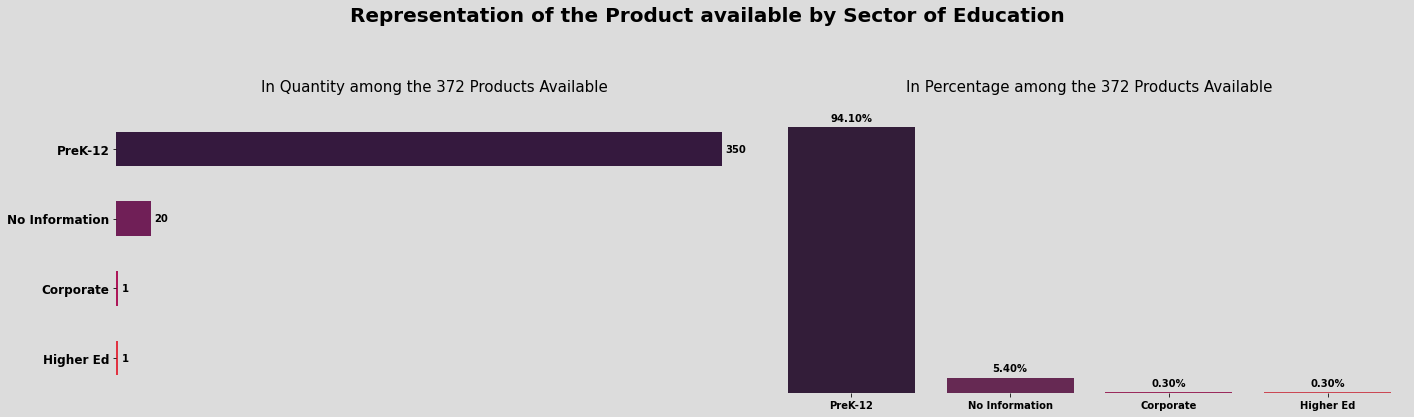

In [29]:
#Creating an extract of the Dataset for representation per Sector 1
Product_Sector1 = products_info.groupby('Sector1')['Provider'].count().sort_values(ascending=False)
plt.figure(figsize=(20,6), facecolor='gainsboro')
#Define the color of the palette
color = sb.color_palette('rocket')

#Defining main title of graphic representation
plt.suptitle('Representation of the Product available by Sector of Education\n', font='segoe UI', size=20, fontweight='bold')

#Create the space for the plot 1
plt.subplot(1,2,1)

Product_Sector1.plot.barh(color=color)
ax = plt.gca()
plt.title('In Quantity among the {} Products Available\n'.format(sum(Product_Sector1.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")

for i in range(4):
    count=Product_Sector1[i]
    count_string = Product_Sector1[i]
    plt.text(count+2, i, f'{count_string:}', va='center', fontweight='bold', size=10)
spines_chart()

#Create the space for the plot 2
plt.subplot(1,2,2)

#Take the share for each product type
Percent_product = Product_Sector1.values/sum(Product_Sector1.values)
#Get the Index of each product type
Xticks_product = Product_Sector1.index
#Plot the percent and product type
percent_plot = sb.barplot(y=Percent_product, x=Xticks_product, palette=color)
plt.title('In Percentage among the {} Products Available\n'.format(sum(Product_Sector1.values)), font='segoe UI', size=15)

#plot value for each column
for p in percent_plot.patches:
    percent_plot.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks(fontweight='bold')
spines_chart()
plt.gca().invert_yaxis()

plt.tight_layout(pad=2)

The most important part of the products available on the Dataset are focusing on the PreK-12 kids, meaning usually 3-year-olds through 12th grade students.

With an amount of 350 products among the 372 available in the dataset, the products targeting specifically PreK-12 students represent a share of 94% of the overall products available.


### Product Category in the Dataset : What is the primary utilization of the product available

The Products Category available, which we will call Category 1, are helping to define the purpose of the product in use.

Within these Category 1, we identify the following main categories :
- LC for Learning and Curriculum representing learning platform and other tools helping teaching the students
- CM for Classroom Management 
- SDO for School & District Operation dedicated for school operation & administration

These 3 Main Categories will be used along the analyze. 
The following charts helps to understand the purpose of the engagement and product available and define how disparate the situation is within the Dataset.

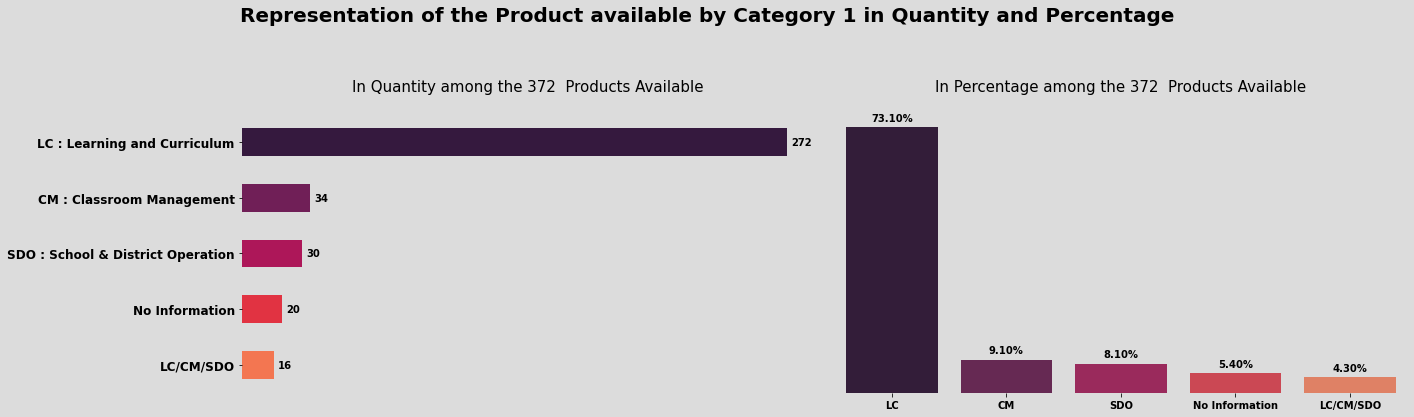

In [30]:
#Creating an extract of the Dataset for representation per Category 1 of products
Product_cat1 = products_info.groupby('Product_cat1')['Provider'].count().sort_values(ascending=False)
color = sb.color_palette('rocket')
plt.figure(figsize=(20,6), facecolor='gainsboro')
legend = ('LC : Learning and Curriculum','CM : Classroom Management','SDO : School & District Operation','No Information','LC/CM/SDO')

#Defining main title of graphic representation
plt.suptitle('Representation of the Product available by Category 1 in Quantity and Percentage\n', font='segoe UI', size=20, fontweight='bold')

#Create the space for the plot 1
plt.subplot(1,2,1)

Product_cat1.plot.barh(color=color)
ax = plt.gca()

plt.title('In Quantity among the {}  Products Available\n'.format(sum(Product_cat1.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")
ax.set_yticklabels(legend)

#plot value for each column
for i in range(5):
    count=Product_cat1[i]
    count_string = Product_cat1[i]
    plt.text(count+2, i, f'{count_string:}', va='center', fontweight='bold', size=10)
spines_chart()



#Create the space for the plot 2
plt.subplot(1,2,2)

#Take the share for each product type
Percent_product = Product_cat1.values/sum(Product_cat1.values)
#Get the Index of each product type
Xticks_product = Product_cat1.index
#Plot the percent and product type
percent_plot = sb.barplot(y=Percent_product, x=Xticks_product, palette=color)
plt.title('In Percentage among the {}  Products Available\n'.format(sum(Product_cat1.values)), font='segoe UI', size=15)

#plot value for each column
for p in percent_plot.patches:
    percent_plot.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks(fontweight='bold')
    
spines_chart()
plt.gca().invert_yaxis()
plt.tight_layout(pad=2)


The Share of product dedicated to the Learning and Curriculum part, engaging directly students represents the higher proportion of the product available in the dataset, representing 272 Products for a share about 73%.

This already giving an insight on the utilization and engagement within the United States.

### Product Category 2 in the Dataset : Showing the Top 10 utilization for the main Categories (LC, CM and SDO)

### Overview of all Product

The Category Level 2 represents a deeper level of understanding on the purpose of the product listed and the last degree of product categorization.
Within the next graphic representation we will focus for each of the 3 main categories, which are the top 10 product categorization in use. 

We do not intend in this section to classify in term of engagement and popularity, just in term of how many of these categories are available for the school and district to use, just as for the previous information.

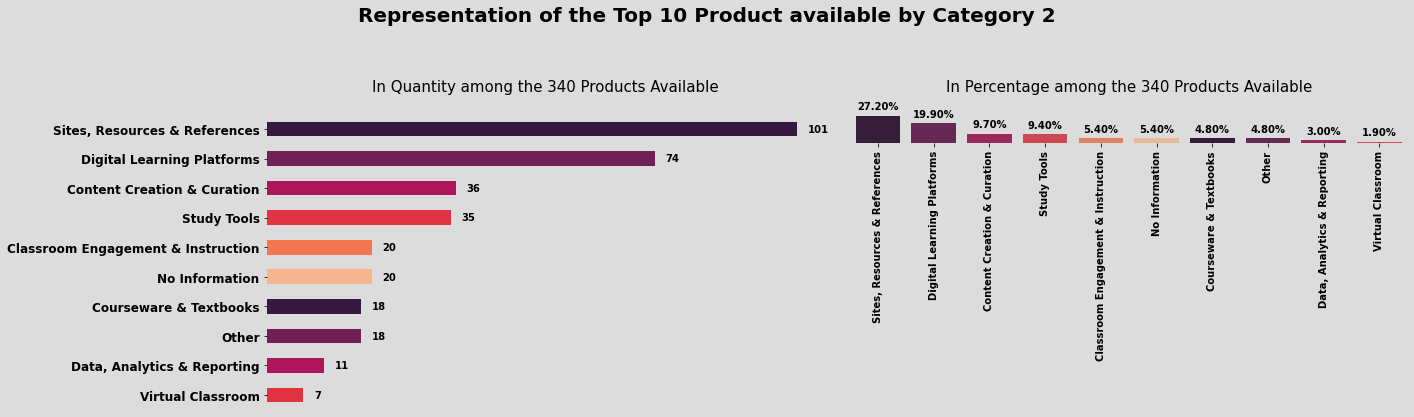

In [31]:
#Creating an extract of the Dataset for representation per Category 1 of products
Product_cat2 = products_info.groupby('Product_cat2')['Provider'].count().sort_values(ascending=False)[0:10]
color = sb.color_palette('rocket')
plt.figure(figsize=(20,6), facecolor='gainsboro')

#Defining main title of graphic representation
plt.suptitle('Representation of the Top 10 Product available by Category 2\n', font='segoe UI', size=20, fontweight='bold')

#Create the space for the plot 1
plt.subplot(1,2,1)

Product_cat2.plot.barh(color=color)
ax = plt.gca()

plt.title('In Quantity among the {} Products Available\n'.format(sum(Product_cat2.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")

#plot value for each column
for i in range(len(Product_cat2)):
    count=Product_cat2[i]
    count_string = Product_cat2[i]
    plt.text(count+2, i, f'{count_string:}', va='center', fontweight='bold', size=10)
spines_chart()



#Create the space for the plot 2
plt.subplot(2,2,2)

#Take the share for each product type
Percent_product2 = Product_cat2.values/sum(Product_cat1.values)
#Get the Index of each product type
Xticks_product2 = Product_cat2.index
#Plot the percent and product type
percent_plot = sb.barplot(y=Percent_product2, x=Xticks_product2, palette=color)
plt.title('In Percentage among the {} Products Available\n'.format(sum(Product_cat2.values)), font='segoe UI', size=15)

#plot value for each column
for p in percent_plot.patches:
    percent_plot.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks(fontweight='bold',rotation=90)

    
spines_chart()
plt.gca().invert_yaxis()
plt.tight_layout(pad=2)


Within all the product available we can see that Sites, Resources & References is the category gathering the higher volume of product reaching 27% of the overall product available in the Dataset.

### Overview per Category Level 1 of the sub-categories level 2

In order to go a little deeper in the analyze, we will have a look on the repartition of product available according to the category level 1.

Enabling a visibility for the 3 main categories being LC, SDO and CM.

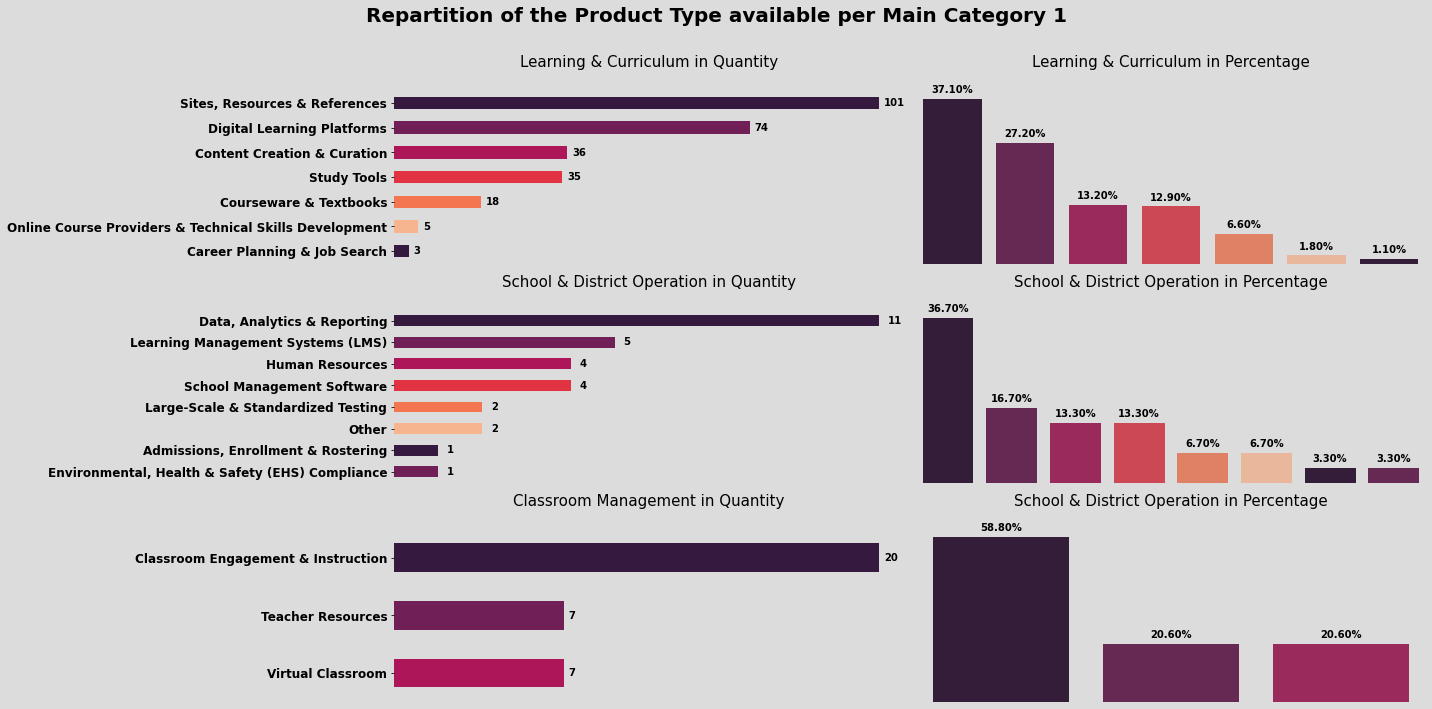

In [32]:
#Create sub dataset of cat 1 and 2
product_cat1_2 = products_info.groupby(['Product_cat1','Product_cat2'])['Provider'].count()
#Create a list of relevant category level 1
SDO_product = product_cat1_2['SDO'].sort_values(ascending=False)
CM_product = product_cat1_2['CM'].sort_values(ascending=False)
LC_product = product_cat1_2['LC'].sort_values(ascending=False)

color = sb.color_palette('rocket')
plt.figure(figsize=(20,10), facecolor='gainsboro')
plt.suptitle('Repartition of the Product Type available per Main Category 1\n', font='segoe UI', size=20, fontweight='bold')

plt.subplot(3,2,1)

LC_product.plot.barh(color=color)
ax = plt.gca()

plt.title('Learning & Curriculum in Quantity\n'.format(sum(LC_product.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")

#plot value for each column
for i in range(len(LC_product)):
    count=LC_product[i]
    count_string = LC_product[i]
    plt.text(count+1, i, f'{count_string:}', va='center', fontweight='bold', size=10)
    
spines_chart()

plt.subplot(3,2,2)

#Take the share for each product type
Percent_LC = LC_product.values/sum(LC_product.values)
#Get the Index of each product type
Xticks_LC = LC_product.index
#Plot the percent and product type
percent_plot_LC = sb.barplot(y=Percent_LC, x=Xticks_LC, palette=color)
plt.title('Learning & Curriculum in Percentage\n', font='segoe UI', size=15)

#plot value for each column
for p in percent_plot_LC.patches:
    percent_plot_LC.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks([])

spines_chart()
plt.gca().invert_yaxis()

plt.subplot(3,2,3)

SDO_product.plot.barh(color=color)
ax = plt.gca()

plt.title('School & District Operation in Quantity\n'.format(sum(SDO_product.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")

#plot value for each column
for i in range(len(SDO_product)):
    count=SDO_product[i]
    count_string = SDO_product[i]
    plt.text(count+0.2, i, f'{count_string:}', va='center', fontweight='bold', size=10)
    
spines_chart()

plt.subplot(3,2,4)

#Take the share for each product type
Percent_SDO= SDO_product.values/sum(SDO_product.values)
#Get the Index of each product type
Xticks_SDO = SDO_product.index
#Plot the percent and product type
percent_plot_SDO = sb.barplot(y=Percent_SDO, x=Xticks_SDO, palette=color)
plt.title('School & District Operation in Percentage\n', font='segoe UI', size=15)

#plot value for each column
for p in percent_plot_SDO.patches:
    percent_plot_SDO.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks([])

spines_chart()
plt.gca().invert_yaxis()

plt.subplot(3,2,5)

CM_product.plot.barh(color=color)
ax = plt.gca()

plt.title('Classroom Management in Quantity\n'.format(sum(CM_product.values)), font='segoe UI', size=15)

plt.xticks([])
plt.yticks(font='segoe UI', size=12, fontweight="bold")

#plot value for each column
for i in range(len(CM_product)):
    count=CM_product[i]
    count_string = CM_product[i]
    plt.text(count+0.2, i, f'{count_string:}', va='center', fontweight='bold', size=10)

spines_chart()
    
plt.subplot(3,2,6)

#Take the share for each product type
Percent_CM= CM_product.values/sum(CM_product.values)
#Get the Index of each product type
Xticks_CM = CM_product.index
#Plot the percent and product type
percent_plot_CM = sb.barplot(y=Percent_CM, x=Xticks_CM, palette=color)
plt.title('School & District Operation in Percentage\n', font='segoe UI', size=15)

#plot value for each column
for p in percent_plot_CM.patches:
    percent_plot_CM.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks([])

spines_chart()
plt.gca().invert_yaxis()

plt.tight_layout()


Interestingly the categorization "Learning & Curriculum" is the one containing the most important part of the product available in term of utilization during the year 2020.

### Short look on the provider available and type of product proposed (Limited to TOP 10)

After having a look on the different product available inside of the dataset, let's have a look on the provider

In [33]:
#Correction of a product name identified during first analyze for better visualization 
products_info[products_info['Provider'] == 'Savvas Learning Company | Formerly Pearson K12 Learning'] = products_info[products_info['Provider'] == 'Savvas Learning Company | Formerly Pearson K12 Learning'].replace('Savvas Learning Company | Formerly Pearson K12 Learning','Savvas Learning Company')

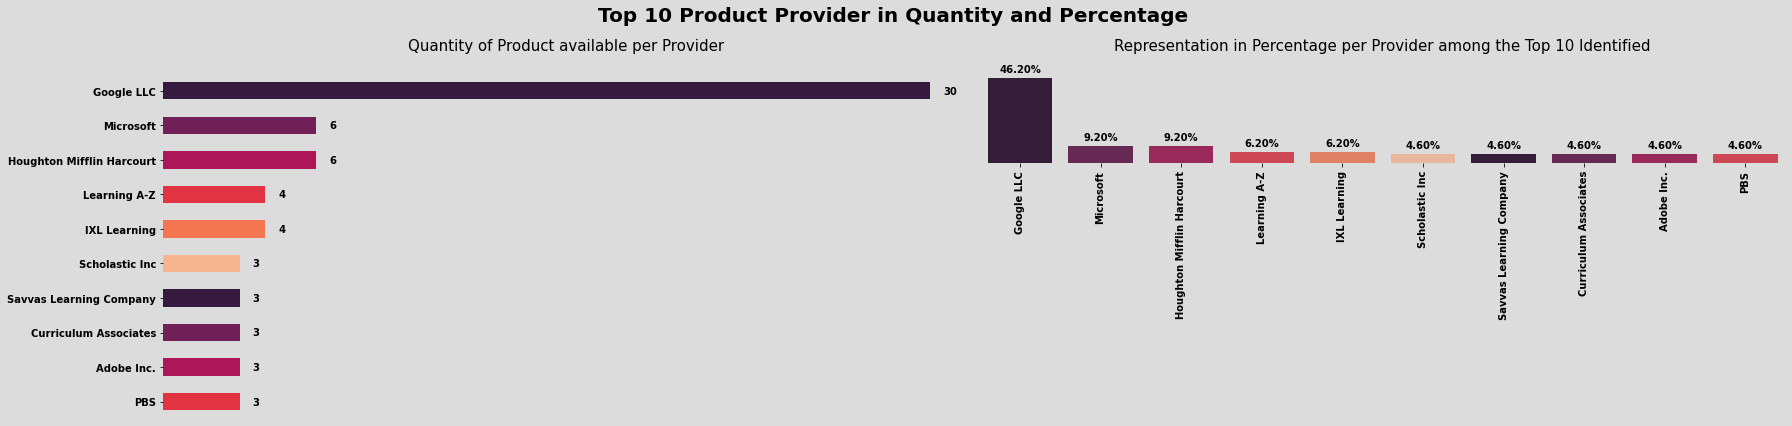

In [34]:
Top10_provider = products_info.groupby('Provider')['Provider'].count().sort_values(ascending=False)[0:10]

color = sb.color_palette('rocket')
plt.figure(figsize=(25,6), facecolor='gainsboro')
plt.suptitle('Top 10 Product Provider in Quantity and Percentage ', font='segoe UI', size=20, fontweight='bold')

plt.subplot(1,2,1)

Top10_provider.plot.barh(color=color)
ax = plt.gca()
plt.title('Quantity of Product available per Provider\n', font='segoe UI', size=15)
plt.yticks(size=10, fontweight='bold')

for i in range(10):
    count=Top10_provider[i]
    count_string = Top10_provider[i]
    plt.text(count+0.5, i, f'{count_string:}', va='center', size=10, fontweight='bold')
plt.xticks([])
spines_chart()

plt.subplot(2,2,2)

#Take the share for each product type
Percent_Top= Top10_provider.values/sum(Top10_provider.values)
#Get the Index of each product type
Xticks_Top = Top10_provider.index
#Plot the percent and product type
percent_plot_Top = sb.barplot(y=Percent_Top, x=Xticks_Top, palette=color)
plt.title('Representation in Percentage per Provider among the Top 10 Identified\n', font='segoe UI', size=15)

#plot value for each column
for p in percent_plot_Top.patches:
    percent_plot_Top.annotate(format((p.get_height()).round(3), f'.02%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks(fontweight='bold', rotation = 90)

spines_chart()
plt.gca().invert_yaxis()

plt.tight_layout()

In term of quantity of product available overall inside of the Dataset, we already remark a strong presence of Google.

By limiting the analyze in Percentage to the TOP 10 Providers, we see clearly in predominance of Google LLC, representing 46% of the products available, clearly distancing on other big players such as Microsoft.

It will be interesting as well to have a look on the spectrum of product proposed by Google in order to check if product for all kind of category is proposed such as LC, SDO and CM.

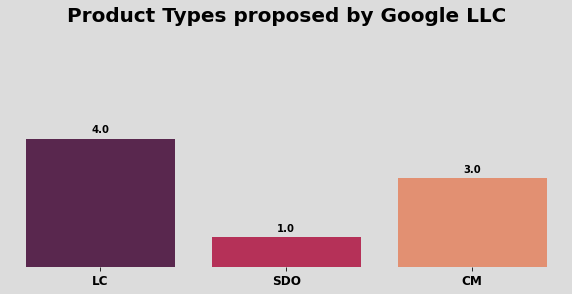

In [35]:
Google_Products = products_info[(products_info['Provider'] == 'Google LLC') & (products_info['Product_cat1'].isin(['LC','SDO','CM']))].groupby(['Product_cat1','Product_cat2'])['Provider'].count().reset_index()
plt.figure(figsize=(10,4), facecolor='gainsboro')
Google_bar = sb.barplot(data=Google_Products, x='Product_cat1',y='Provider', order = ['LC','SDO','CM'], palette="rocket", errwidth=0)

plt.title('Product Types proposed by Google LLC\n', font='segoe UI', size=20, fontweight='bold')

for p in Google_bar.patches:
    Google_bar.annotate(format((p.get_height().round(0)), f'1'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
plt.xticks(font='segoe UI', size=12, fontweight="bold")
spines_chart()
plt.gca().invert_yaxis()

We observed that Google LLC is present in every branch of products proposed with an higher part on Learning and Curriculum and Classroom Management

### Further Data Preparation for the Analyze

In [36]:
#Create list of district
list_district = list(districts_info['district_id'])
list_product = list(products_info['lp_id'])
#Create DataFrame of district_data with only district with information on district_info dataframe
district_data_clean = district_data[(district_data['district_id'].isin(list_district)) & (district_data['lp_id'].isin(list_product)) & (district_data['engagement_index']>0)]

In [37]:
#Summarize engagement per product for the year
product_engagement = district_data_clean.groupby('lp_id')['engagement_index'].mean()
product_engagement = pd.DataFrame(product_engagement, index=None)
#defined percentage of engagement per product
product_engagement['percent_engagement'] = (product_engagement/product_engagement.sum())*100
product_engagement = product_engagement.sort_values(by='percent_engagement', ascending=False).reset_index()

In [38]:
from pandas.tseries.offsets import BDay
#Create a column defining Business Days and non Business Days
isBusinessDay = BDay().is_on_offset
district_data_clean['Is_BD'] = district_data_clean['time'].map(isBusinessDay)

In [39]:
#Create a column Week
district_data_clean['week'] = district_data_clean['time'].apply(lambda x: x.isocalendar()[1])
#Create a column quarter
district_data_clean['quarter'] = district_data_clean['time'].dt.quarter
#Create column month
district_data_clean['month'] = district_data_clean['time'].dt.month

Merging the product data with the engagement data

In [40]:
district_data_clean = district_data_clean.merge(products_info, on='lp_id') 

Merging district data with the district information (state and locale)

In [41]:
district_data_clean = district_data_clean.merge(districts_info[['state','locale','district_id']], on='district_id')

Drop from the district_data_clean all days which are no business days

In [42]:
district_data_clean = district_data_clean[district_data_clean['Is_BD']==True]

<a id='geolocation'></a>
## Geographical Information and Localization around the Dataset

### Identification of the the District Location and their Geo/sociologic situation

We already saw inside the Dataset that multiple information around the district are available making it possible to identify :
- whether a district in 1 US state or the other
- whether a district is located in a City, Rural, Town or Suburban area

The following visualization should help us to define where are most of the district located and their importance inside of the following analyze which could be necessary to take later into consideration (like presence of potential biase in the analyze or data).

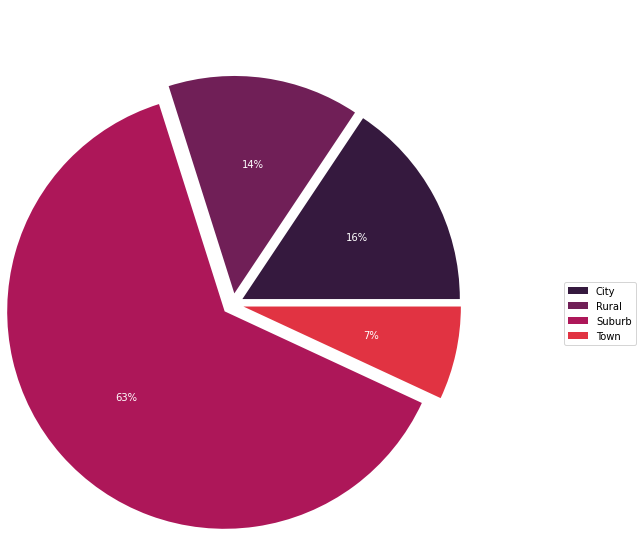

In [43]:
#Create a dataframe to analyze repartition of the district
District_Analyze = district_data_clean.groupby('locale').count()['state']
District_Analyze = pd.DataFrame(District_Analyze)
District_Analyze['percent_local'] = District_Analyze['state']/District_Analyze['state'].sum()
colors = ('royalblue','steelblue', 'cornflowerblue', 'darkblue')
plt.figure(figsize=(10,5))
plt.pie(District_Analyze['percent_local'], autopct='%1.0f%%', colors=sb.color_palette('rocket'), radius=2, textprops={'color':"w"},explode=(0.1, 0.1, 0.1, 0.1))
plt.legend(District_Analyze.index, bbox_to_anchor = (2, 0.6))
plt.title('Geographical Situation of the district', pad=150, color='w', size=15, fontweight='bold');

The overall repartition of all the district help to clearly identify that most of the district for which we are having data available are located in the Suburb area.

The second most important part being almost to equality between City and Rural areas.

### Repartition of the district per state

The number of district available per state should help us as well to identify which information we should consider carrefully.
Indeed, the higher the representation of 1 specific state is, the higher will be its impact on the overall analyze.

Education, products and other services like socio-economic measure, are mostly taken by one State and could differ from one state to the other.

The goal of the visualization below is as well to identify potential biase which the reader must be taken aware of.
This presenting a limitation of the overall result

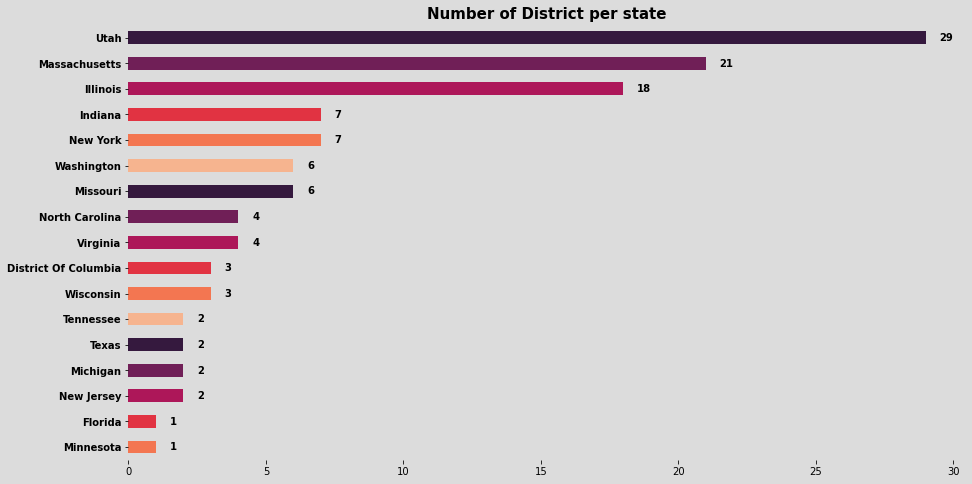

In [44]:
#Create a dataset containing the state and count of district information for visualization.
District_state = district_data_clean[['state','district_id']].groupby('state').nunique()['district_id'].sort_values(ascending=False)
color = sb.color_palette('rocket')
plt.figure(figsize=(15,8), facecolor='gainsboro')
#plotting the bar chart
District_state.plot.barh(color=color)
ax = plt.gca()
plt.title('Number of District per state', fontweight='bold', size=15)
plt.yticks(size=10, fontweight='bold')

#plot the number for each bars
for i in range(len(District_state)):
    count=District_state[i]
    count_string = District_state[i]
    plt.text(count+0.5, i, f'{count_string:}', va='center', size=10, fontweight='bold')

spines_chart()

The above representation clearly shows an over-representation of the states of Utah, Massachussets and Illioins within the dataset.

With respectively 29, 21 and 18 districts represented for the engagement of the product and software in use.
Now that the information of the district per state is available we will as well have a look on the repartition of the district for each states in term of geo-sociologic information.

### Geographical repartition of the district per state

We will first create a Dataset gathering the relevant information and represent them in a pie chart for each state.

In [45]:
geo_per_state = district_data_clean.groupby(['state','locale']).count()['engagement_index']
geo_per_state = pd.DataFrame(geo_per_state)
geo_per_state['percent_geo'] = geo_per_state.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
geo_per_state = geo_per_state.reset_index()

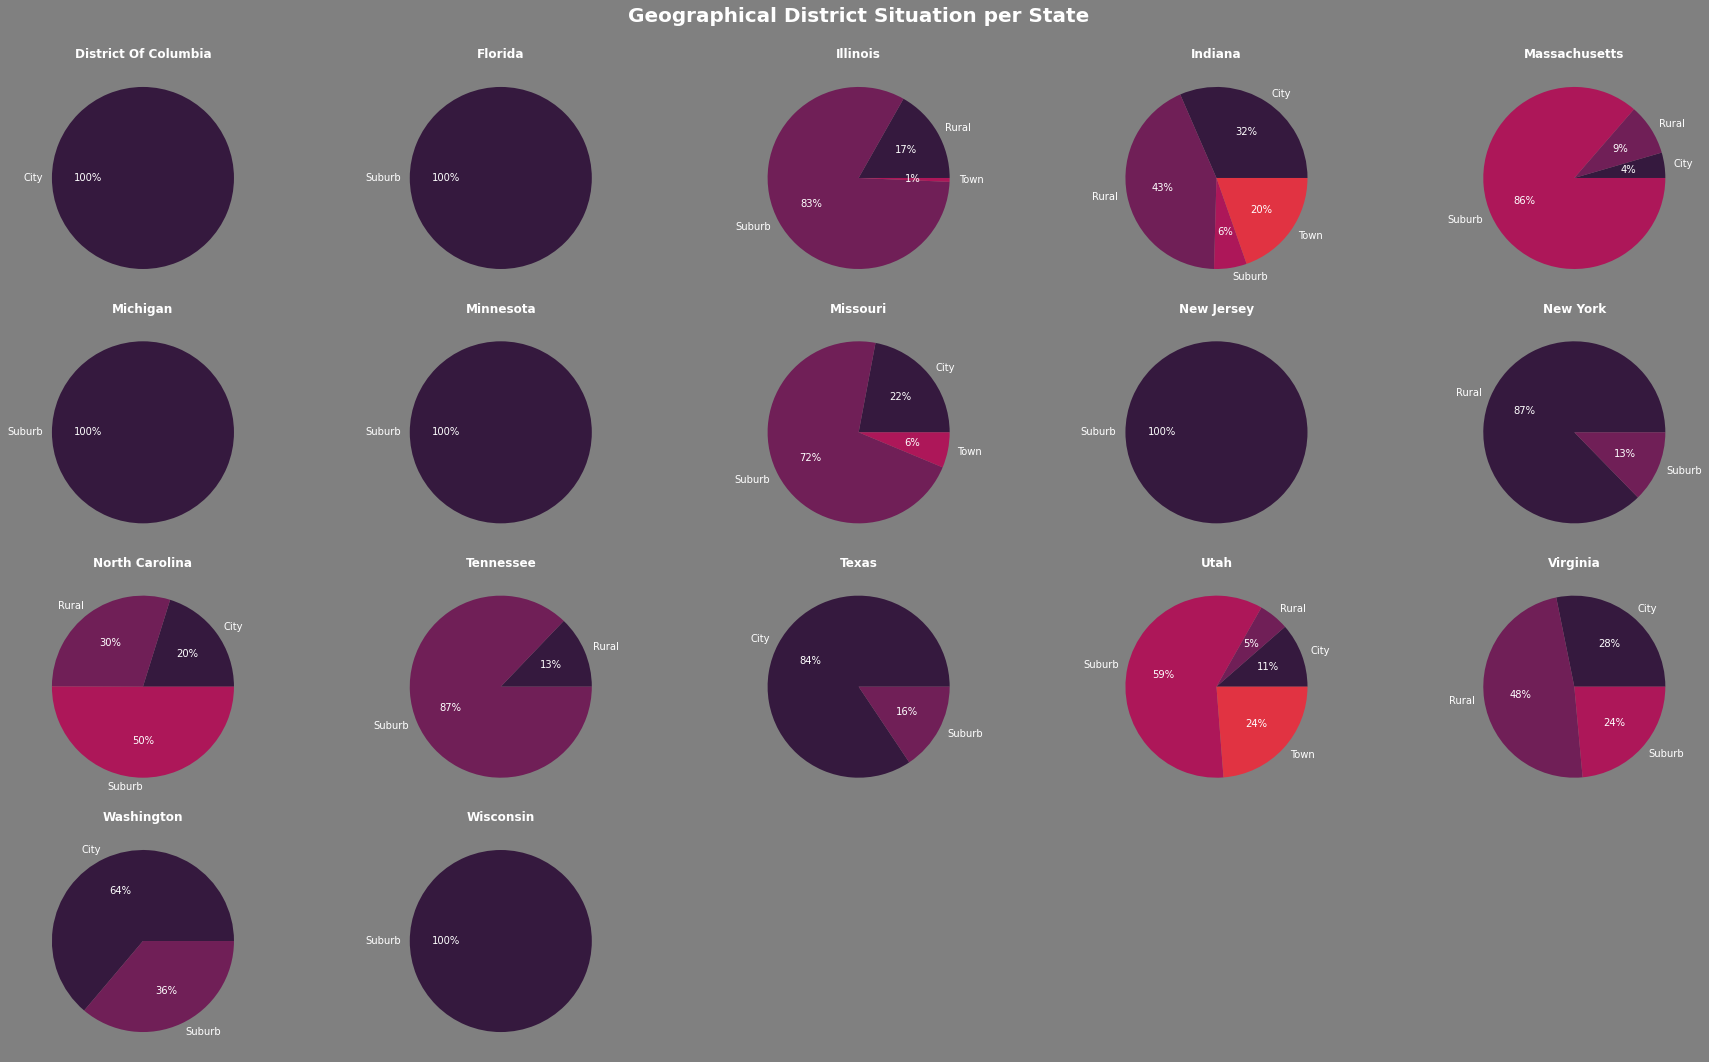

In [46]:
import matplotlib.patches as mpatches

add_axe = 1
plt.figure(figsize=(25,15), facecolor='grey')
plt.suptitle('Geographical District Situation per State\n', color='w', size=20, fontweight='bold')

state = geo_per_state['state'].unique()
labels = geo_per_state['locale'].unique()
handles = geo_per_state['locale'].unique()
lines=[]

for i in state:

    plt.subplot(4,5,add_axe)
    state = geo_per_state[geo_per_state['state']== i ][['locale','percent_geo']]
    plt.pie(state['percent_geo'],labels = state['locale'], autopct='%1.0f%%', textprops={'color':"w"},colors=sb.color_palette('rocket'))
    plt.title(i,color='w', fontweight='bold')
    #plt.legend(bbox_to_anchor = (1,0.6))
    plt.tight_layout()
    add_axe = add_axe+1

The previously made graphical representation helped us to better understand the data which are available in the different Dataset.

Among the exploration we find out that :
- Product being part of the Learning and Curriculum category are representing the higher part of the product available.
- 3 state are over represented within the data available representing a biase and limitation of the analyze of the situation, focusing on 3 states mainly the data cannot be used to take out clear statement in term of the connectivity and engagement whithin the US. We should use this information later in order to pay attention in the graphical representation and potentially using mean values when it comes to deeper engagement analyze or comparison between 1 state to the other.
- MOst of the district data information gathered are representing a suburban area

<a id='engagement'></a>
## Analyze of the Engagement evolution during the COVID19 pandemic

- Engagement Evolution in total and averaged in the USA
- Engagement Evolution per product type (LC, CM, SDO) in total 

Preparation of the data for visualization

In [47]:
#Create a dataset for the sum of the engagement index
engagement_evo = district_data_clean.groupby('time').sum().reset_index()
#Create a dataset for the mean of the engagement index
engagement_evo_mean = district_data_clean.groupby('time').mean().reset_index()

In [48]:
#Create a dataset for the sum of the engagement index per product type
engagement_product = district_data_clean[district_data_clean['Is_BD']==True].groupby(['Product_cat1','time']).sum()
engagement_product = engagement_product.reset_index()

### Evolution of the Engagement Index in 2020 in the USA (in Total and Average)

The below visualization will provide us an overview of the evolution of the engagement index, being the number of page load in total and in average for the USA.

We will include as well the Bank Holidays in the USA in order to understand potential pick and drop on the index evolution

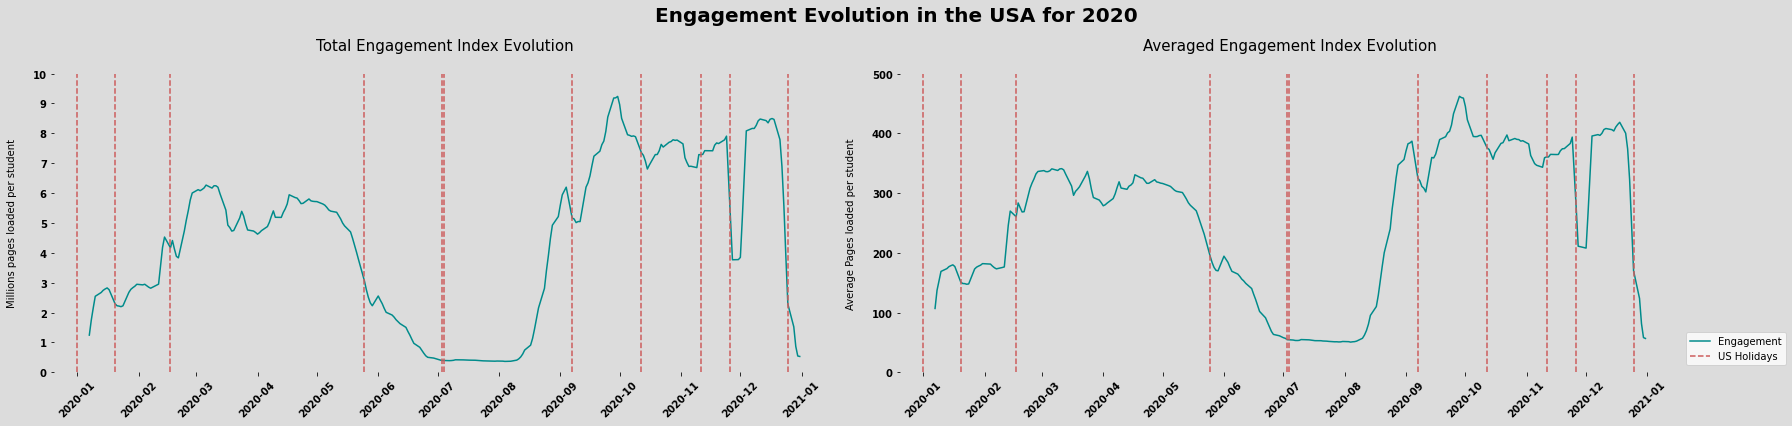

In [49]:
#Create a list of date for federal bank holidays in US
US_holidays = list(holidays.UnitedStates(years=2020).keys())
                   
plt.figure(figsize=(25,6), facecolor='gainsboro')
plt.suptitle('Engagement Evolution in the USA for 2020', font='segoe UI', size=20, fontweight='bold')

plt.subplot(1,2,1)
plt.ylim(0,10000000)
plt.yticks()
#for each Prod_cat1 plot the timeline of engagement

plt.plot(engagement_evo['time'], engagement_evo['engagement_index'].rolling(window=5).mean(), color='darkcyan')

#Add US Holidays on the chart
for j in range(0, len(US_holidays)) :
    plt.axvline(x=US_holidays[j], linestyle='--', color='indianred')
    

spines_chart()

plt.gca().invert_yaxis()
plt.yticks([0, 1e6,2e6,3e6,4e6,5e6,6e6,7e6,8e6,9e6, 10e6], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontweight='bold')
plt.ylabel('Millions pages loaded per student\n')
plt.xticks(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], 
           ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], rotation = 45, fontweight='bold');
plt.title('Total Engagement Index Evolution\n', size=15)

plt.subplot(1,2,2)

plt.ylim()
plt.yticks()
#for each Prod_cat1 plot the timeline of engagement

plt.plot(engagement_evo_mean['time'], engagement_evo_mean['engagement_index'].rolling(window=5).mean(), color='darkcyan')

#Add US Holidays on the chart
for j in range(0, len(US_holidays)) :
    plt.axvline(x=US_holidays[j], linestyle='--', color='indianred')
    

spines_chart()

plt.gca().invert_yaxis()
plt.yticks([0,100,200,300,400,500], fontweight='bold')
plt.ylabel('Average Pages loaded per student\n')
plt.xticks(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], 
           ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], rotation = 45, fontweight='bold');
plt.title('Averaged Engagement Index Evolution\n', size=15)

custom_legend = ['Engagement', 'US Holidays']
plt.legend(custom_legend, bbox_to_anchor = (1, 0.15))

plt.tight_layout();


Without taking into consideration first the different waves of the pandemic the country faced, we clearly already see the impact of bank holiday and as well student holidays on the engagement index.
Each drop identified on the engagement correspond almost all the time with the start of a bank holiday.

Interestingly as well, we see in term of millions of pages loaded per student that the level is quite higher for the 4th quarter as for the 2 first one.
This might be explained by the quick implementation of local protection policy at the beginning of the pandemic faced by an educational system not quite ready to follow a global Shelter@Home policy.

On the other end, we could speculate and see a potential readiness of the educational system and installation on the last quarter of the year.

### Evolution of the Engagement Index in 2020 in the USA (Per Product Categy 1)

The evolution of the engagement index per category level 1 (LC, SDO, CM),already analyzed before should provide us as well a taste of the type of product mostly used within the educational system.

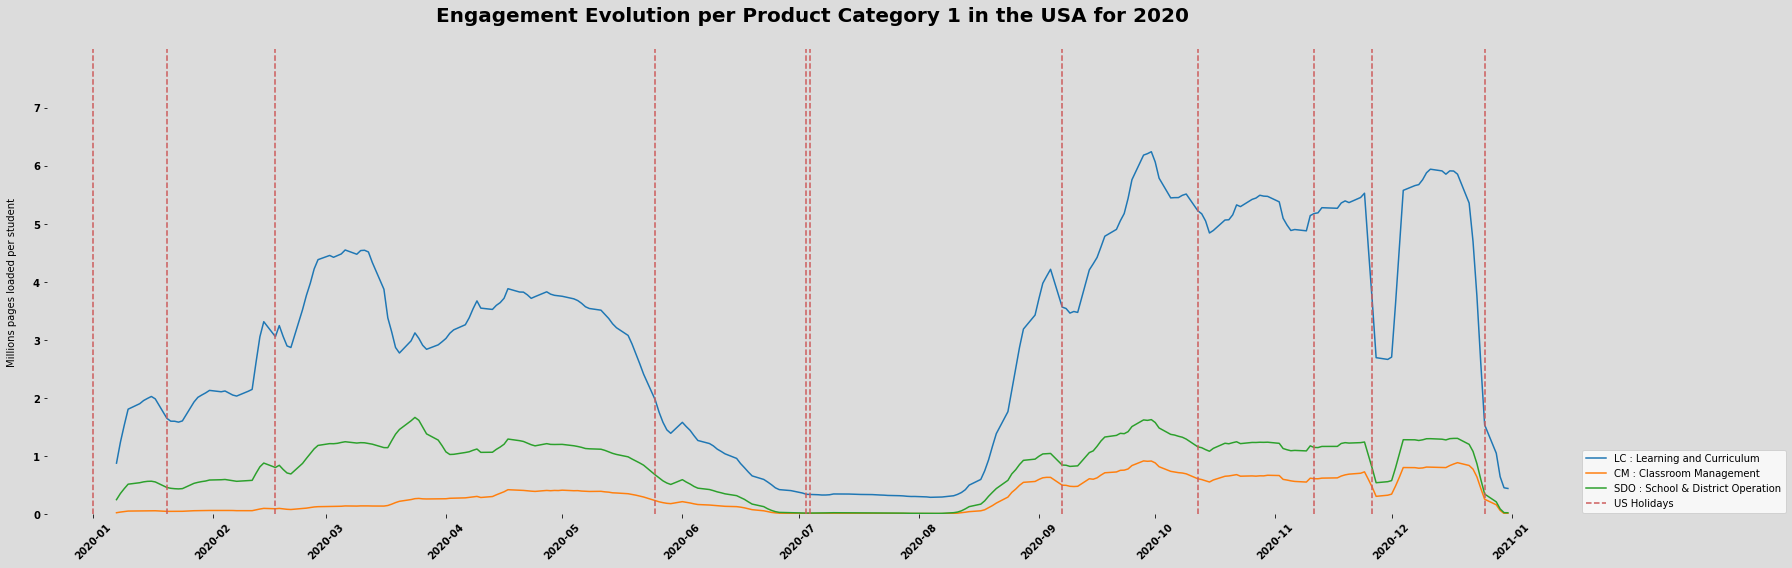

In [50]:
#Create a list of product category 1
Prod_cat1 = ['LC', 'CM','SDO']
#Create a list of date for federal bank holidays in US
US_holidays = list(holidays.UnitedStates(years=2020).keys())
                   
plt.figure(figsize=(25,8), facecolor='gainsboro')
plt.ylim(0,8000000)
plt.yticks()
#for each Prod_cat1 plot the timeline of engagement
for i in Prod_cat1 :
    test = plt.plot(engagement_product[engagement_product['Product_cat1'] == i]['time'], engagement_product[engagement_product['Product_cat1'] == i]['engagement_index'].rolling(window=5).mean())

#Add US Holidays on the chart
for j in range(0, len(US_holidays)) :
    plt.axvline(x=US_holidays[j], linestyle='--', color='indianred')

spines_chart()
plt.gca().invert_yaxis()
plt.yticks([0, 1e6,2e6,3e6,4e6,5e6,6e6,7e6], ['0', '1', '2', '3', '4', '5', '6', '7'], fontweight='bold')
plt.ylabel('Millions pages loaded per student\n')
plt.xticks(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], 
           ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], rotation = 45, fontweight='bold');
plt.title('Engagement Evolution per Product Category 1 in the USA for 2020\n', fontweight = 'bold', size=20)


custom_legend = ['LC : Learning and Curriculum', 'CM : Classroom Management','SDO : School & District Operation','US Holidays']
plt.legend(custom_legend, bbox_to_anchor = (1, 0.15))
plt.tight_layout();

The trend for the product category level 1 is the same as for the overall engagement index. We can identify 2 important waves with an almost flat curve corresponding with the summer holidays.

In the past graphic representation dedicated to the repartition of the type of product available, where LC product were having the higher share, we see that this is as well reflected in term of engagement index. 

The product related to the Learning and Curriculum part are representing the higher part in term of total engagement index. 
Unsurprisingly nevertheless, as LC Product engaged foremost the student for which the dataset is as well dedicated.

Interestingly as well, we observe the School & District Operation area is keeping approximately the same curve for both part of the year, corresponding the the 2nd and 4th quarter of 2020.
Classroom management is registering an higher utilization (in term of engagement).

### Engagement Index per Product Type : Yearly and Quarterly Evolution

__Evolution of the situation in term of Share of engagement index along the products__

In [51]:
#Preparation of the Data for Product Type Analyze
product_engagement = product_engagement.merge(products_info, on='lp_id')

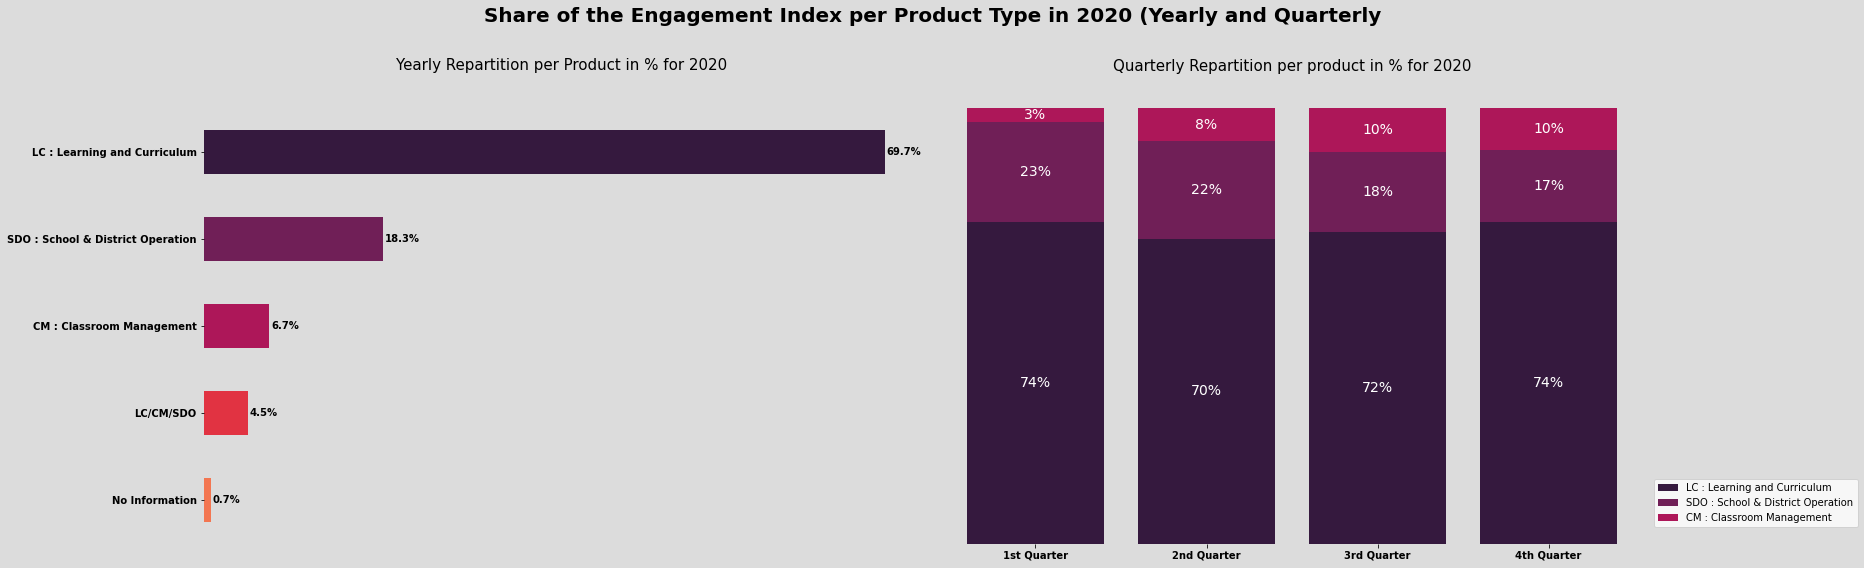

In [52]:
prod_quarterly_evo = district_data_clean[district_data_clean['Product_cat1'].isin(Prod_cat1)].groupby(['quarter','Product_cat1']).sum('engagement_index')['engagement_index']
prod_quarterly_evo = pd.DataFrame(prod_quarterly_evo)
prod_quarterly_evo['percent_geo'] = prod_quarterly_evo.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
prod_quarterly_evo = prod_quarterly_evo.reset_index()

#Sum the engagement index per category Type 1
engagement_cat1 = product_engagement.groupby('Product_cat1').sum()['percent_engagement'].sort_values(ascending=False)
color = sb.color_palette('rocket')
#Define size of graphic and plot
plt.figure(figsize=(26,8), facecolor='gainsboro')
plt.suptitle('Share of the Engagement Index per Product Type in 2020 (Yearly and Quarterly\n', size=20, fontweight='bold')
#ploting category 1

plt.subplot(1,2,1)

#plot graphic
engagement_cat1.plot.barh( color=color)
plt.yticks(fontweight='bold')
plt.xticks([])
#put the labels per bar considering the % per type ploted
for i in range(len(engagement_cat1)):
    count=engagement_cat1[i]
    count_string = engagement_cat1[i]
    plt.text(count+0.2, i, f'{count_string.round(1)}%', va='center', size=10, fontweight='bold')
spines_chart()

plt.gca().set_yticklabels(['LC : Learning and Curriculum','SDO : School & District Operation', 'CM : Classroom Management','LC/CM/SDO','No Information'])

plt.title('Yearly Repartition per Product in % for 2020', size=15, pad=38);

plt.subplot(1,2,2)

#Create a list of the quarter and the product's type
quarter = prod_quarterly_evo['quarter'].unique()
product1 = product_engagement[product_engagement['Product_cat1'].isin(Prod_cat1)].groupby('Product_cat1').sum()['percent_engagement'].sort_values(ascending=False).index
colors=sb.color_palette('rocket')
baselines = np.zeros(len(quarter))


plt.ylim(0,100)
for i in range(len(product1)):
    prod1 = product1[i]
    inner_percent = prod_quarterly_evo[prod_quarterly_evo['Product_cat1']==prod1][['quarter','percent_geo']]
    test2 = plt.bar(x = quarter, height=inner_percent['percent_geo'], bottom=baselines, color=colors[i], label=inner_percent['percent_geo'].values)
    baselines += inner_percent['percent_geo'].values
    plt.bar_label(test2,  labels=[f'{e.astype(int)}%' for e in inner_percent['percent_geo'].values.round(0)], color='w', fontsize=14, label_type='center')

plt.legend(['LC : Learning and Curriculum', 'SDO : School & District Operation', 'CM : Classroom Management','LC/CM/SDO','No Information'],bbox_to_anchor = (1, 0.16))
spines_chart()
plt.gca().invert_yaxis()
plt.xticks([1,2,3,4], ['1st Quarter','2nd Quarter','3rd Quarter','4th Quarter'],fontweight='bold');
plt.yticks([])
plt.title('Quarterly Repartition per product in % for 2020\n', size=15, pad=20)
plt.tight_layout();

Along the quarter, the evolution of the engagement index in term share between the type of product is not changing significantly.
We see the share for product in the "Learning and Curriculum" area remaining almost the same from quarter 1 to 4 with a slight reduction of 4% to 2% on quarter 2 and 3.
Interestingly the share of the product aiming for "School & District Operation" reducing along the quarter from 23% on the 1st quarter to 17% on the last 4th quarter of 2020.

The important evolution is to observe on the Classroom Management evolving from 3% during the 1st Quarter, jumping to 8% on the 2nd Quarter and stabilizing at 10% for the 3rd and 4th quarter.
We could explain this evolution by an adaption of the learning systems within the educational environment to a new kind of organization aiming for digitalizing more the Classroom Management.

An organization facing quickly a new situation evolved and adapt to a virtual environment within 2020.

__Further analyze of the engagement index in term of page loaded along the Products Type 1__

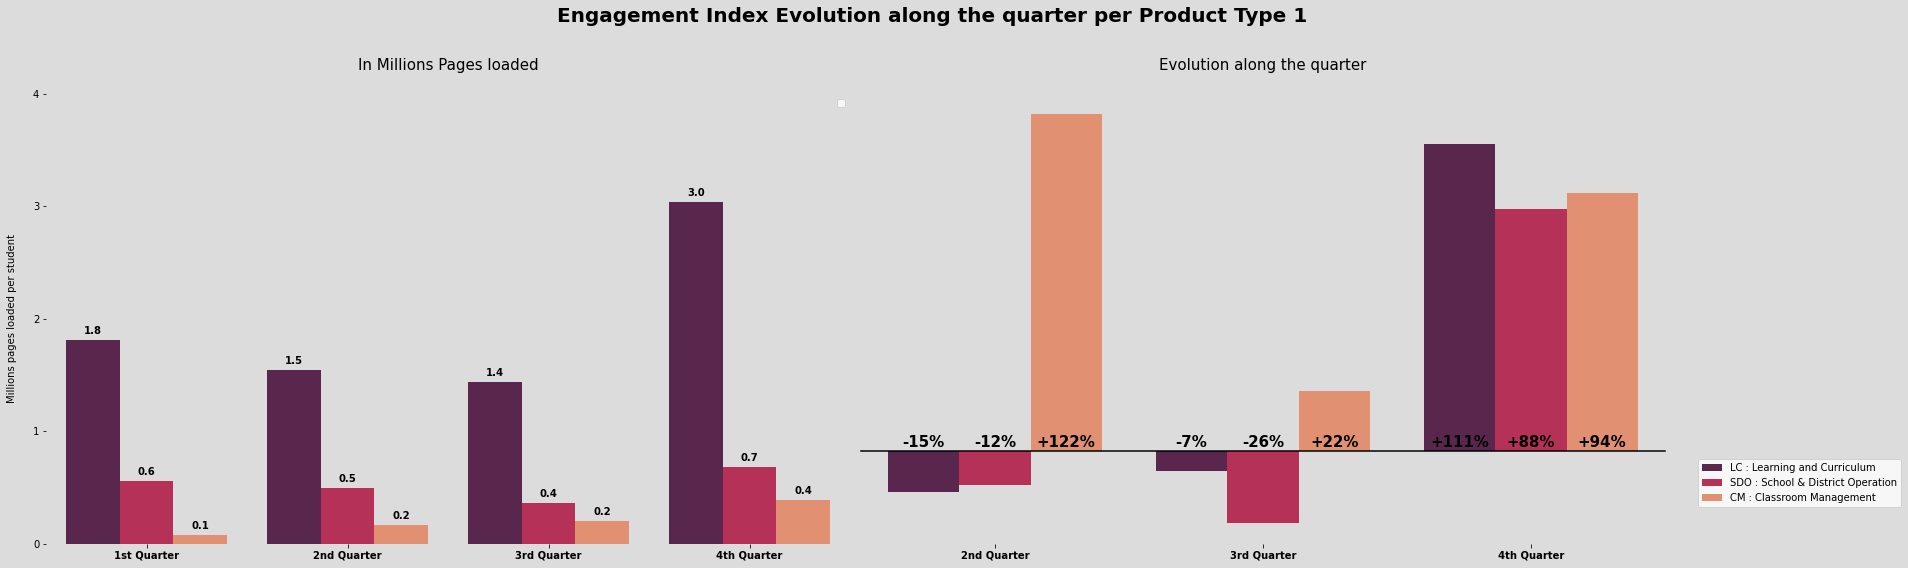

In [53]:
plt.figure(figsize=(26,8), facecolor='gainsboro')
plt.suptitle('Engagement Index Evolution along the quarter per Product Type 1\n', size=20, fontweight='bold')

labels_all = ['LC : Learning and Curriculum', 'SDO : School & District Operation', 'CM : Classroom Management','LC/CM/SDO','No Information']

plt.subplot(1,2,1)

test1 = sb.barplot(data=prod_quarterly_evo, x='quarter',y='engagement_index', hue='Product_cat1', order=quarter, hue_order=product1, palette="rocket")

spines_chart()

plt.yticks([0, 1e8,2e8,3e8,4e8], ['0', '1', '2', '3', '4'])
plt.xticks([0,1,2,3], ['1st Quarter','2nd Quarter','3rd Quarter','4th Quarter'],fontweight='bold');

plt.ylabel(('Millions pages loaded per student\n'))
plt.title('In Millions Pages loaded\n', size=15)

#h, l = test1.get_legend_handles_labels()
plt.legend([])

for p in test1.patches:
    test1.annotate(format((p.get_height()/1e8).round(1), f'1'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)

plt.gca().invert_yaxis()

plt.subplot(1,2,2)

#Include difference% for each product per quarter vs quarter 1
prod_quarterly_evo['pct_change'] = prod_quarterly_evo.groupby('Product_cat1')['engagement_index'].pct_change()

#Prepare data for visualization
visual_quarter_prod_evo = prod_quarterly_evo[(prod_quarterly_evo['Product_cat1'].isin(['CM', 'SDO', 'LC'])) & (prod_quarterly_evo['quarter'] >1)]

#Plot the barplot
labels = ['LC : Learning and Curriculum', 'SDO : School & District Operation', 'CM : Classroom Management']
test = sb.barplot(data=visual_quarter_prod_evo, x='quarter',y='pct_change', hue='Product_cat1', hue_order=product1[0:3],palette="rocket")

plt.axhline(0, color="k", clip_on=False)
plt.title('Evolution along the quarter\n', size=15)

h, l = test.get_legend_handles_labels()
plt.legend(h, labels, bbox_to_anchor = (1.3, 0.2))

spines_chart()

plt.xticks([0,1,2], ['2nd Quarter','3rd Quarter','4th Quarter'],fontweight='bold')
plt.yticks([])

for p in test.patches:
    test.annotate(format(p.get_height(), f'+.0%'), 
                   (p.get_x() + p.get_width() / 2., 0), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=15)
    
plt.gca().invert_yaxis()

plt.tight_layout()

In term of million page loaded and evolution along the quarter we see different interesting information:

On the 2nd quarter in comparison to the 1st quarter, the Classroom management, and as observed in the previous visualization, is facing an important evolution with 122% more page loaded.
This evolution is continuously repeated from one quarter to the other with +22% on the 3rd quarter and +94% on the 4th quarter. Nevertheless this huge evolution of +94% is to balance between the phases of the school life organization, the 3rd quarter starting in the middle of the summer vacation time during which no student (almost no children) are having courses to follow.

Nevertheless the spike is clearly visible during the 4th quarter for all product types. We will have a quick look on the difference between the 1st and the 4th quarter now which are the most interesting quarter as the 2nd and 3rd quarter are biased with the summer vacation period.

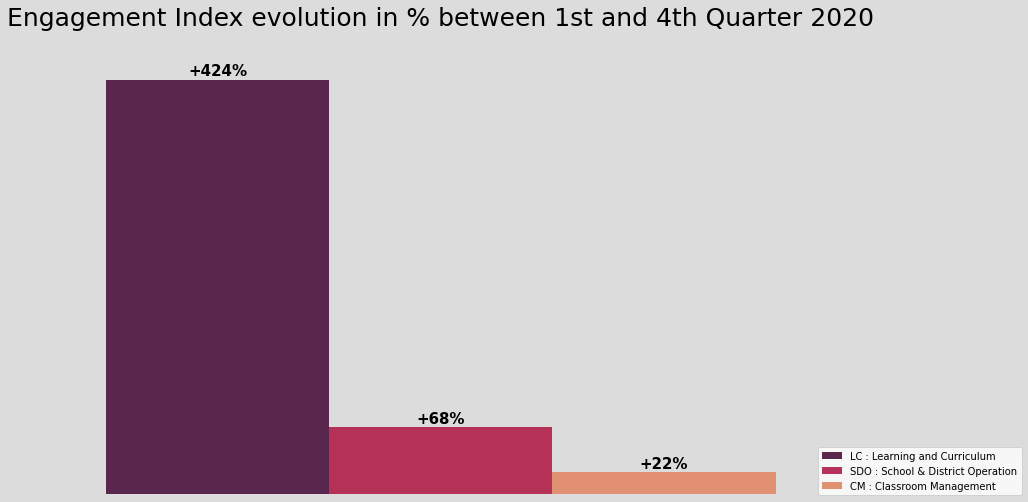

In [54]:
#get change pct between 1st and 4th quarter
quarter1_quarter4 = prod_quarterly_evo[(prod_quarterly_evo['Product_cat1'].isin(['CM', 'SDO', 'LC'])) 
                                                      & (prod_quarterly_evo['quarter'].isin([1,4]))][['quarter','Product_cat1','engagement_index']]

quarter1_quarter4['pct_change'] = quarter1_quarter4.groupby('Product_cat1')['engagement_index'].pct_change()

#plot the different in pct between the 1st and the 4th quarter
plt.figure(figsize=(15,8), facecolor='gainsboro')
test2 = sb.barplot(data=quarter1_quarter4[3:6], x='quarter', y='pct_change', hue='Product_cat1',palette="rocket") 
spines_chart()

#add the labels for each bar in the plot
for p in test2.patches:
    test2.annotate(format(p.get_height(), f'+.0%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=15)
    
plt.title('Engagement Index evolution in % between 1st and 4th Quarter 2020\n', size=25)

h, l = test2.get_legend_handles_labels()
plt.legend(h, labels, bbox_to_anchor = (1.20, 0.12))

plt.xticks([])
plt.yticks([])

plt.gca().invert_yaxis()

The comparison between the 1st and 4th quarter shows a concrete evolution in term of million of pages loaded per student.
All products in use see an evolution with an much higher level for the Learning and Curriculum area reaching +424% on the 4th Quarter in comparison to the 1st Quarter.

### Evolution of the Engagement Index per locality (City, Suburb, Town and rural)

After having analyzed the situation per product type, let's have a look in term of localization of the district.
We should her find as well back a predominance of the Suburban area, as this one representing the higher part of the data available in the dataset

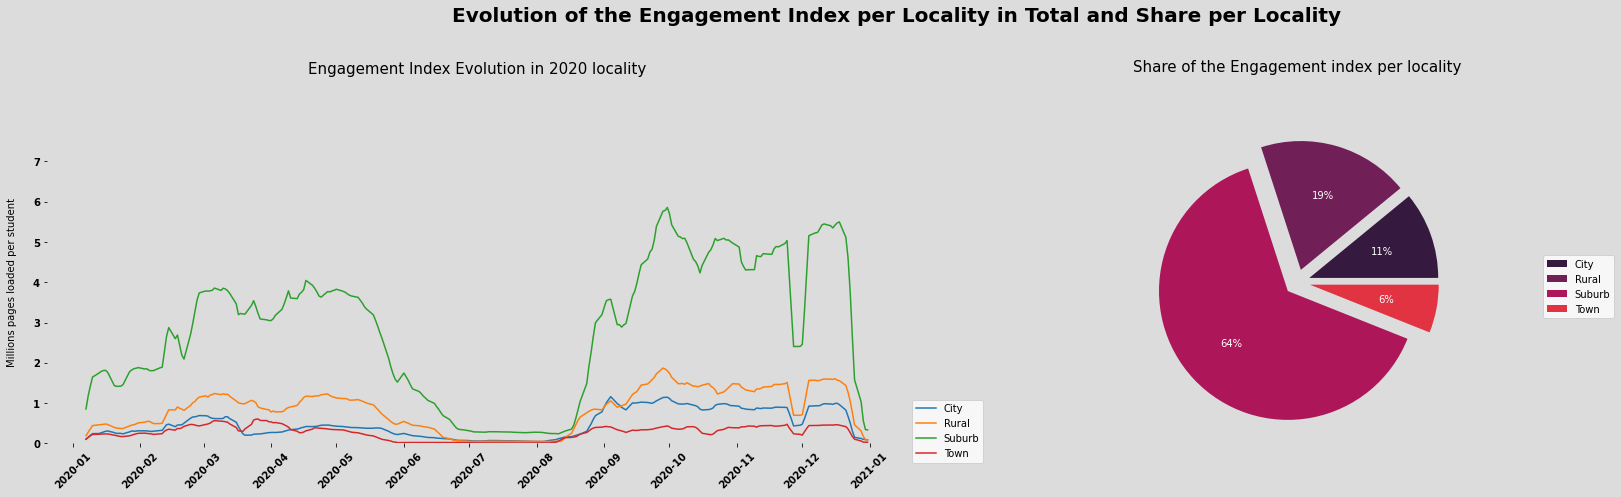

In [55]:
#Engagement data per locale and dates
evo_per_locale = district_data_clean[district_data_clean['Is_BD']==True].groupby(['locale','time']).sum().reset_index()[['time','locale','engagement_index']]
#Create a list of local
list_locale = evo_per_locale['locale'].unique()
plt.figure(figsize=(25,7), facecolor='gainsboro')
plt.suptitle('Evolution of the Engagement Index per Locality in Total and Share per Locality\n', font='segoe UI', size=20, fontweight='bold')

plt.subplot(1,2,1)

plt.ylim(0,8000000)
plt.yticks()
#for each locale plot the timeline of engagement
for i in list_locale :
    plt.plot(evo_per_locale[evo_per_locale['locale'] == i]['time'], evo_per_locale[evo_per_locale['locale'] == i]['engagement_index'].rolling(window=5).mean())

spines_chart()
plt.gca().invert_yaxis()
plt.yticks([0, 1e6,2e6,3e6,4e6,5e6,6e6,7e6], ['0', '1', '2', '3', '4', '5', '6', '7'], fontweight='bold')
plt.ylabel('Millions pages loaded per student\n')
plt.xticks(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], 
           ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], rotation = 45, fontweight='bold');
plt.title('Engagement Index Evolution in 2020 locality\n', size=15, pad=30)

plt.legend(list_locale, bbox_to_anchor = (1, 0.15))

plt.subplot(1,2,2)

plt.pie(evo_per_locale.groupby('locale')['engagement_index'].sum(), autopct='%1.0f%%', textprops={'color':"w"},colors=sb.color_palette('rocket'), radius=1, explode=(0.1,0.1,0.1,0.1))
plt.title('Share of the Engagement index per locality', pad=50, size=15)
plt.legend(District_Analyze.index, bbox_to_anchor = (1.5, 0.6));

plt.tight_layout();

As supposed, we see that the higher Engagement Index is localized within the Suburban area reaching as well 64% of the overall engagement index for 2020.

Even if the other area are following approximately the same curve, the level remains pretty low for the overall year 2020.

This limitation in term of Data should force us no to draw conclusion on this area, but just keep the information for potential further analyze. As we saw before, the number of district per states is strongly influencing these results (Utah with 29 District, mostly located in the suburban area).

### Evolution of the Engagement Index per Locality : Quarterly comparison

In [56]:
#Data Preparation for visualization
locale_quarterly_evo = district_data_clean.groupby(['quarter','locale']).sum('engagement_index')['engagement_index']
locale_quarterly_evo = pd.DataFrame(locale_quarterly_evo)
locale_quarterly_evo['percent_geo'] = locale_quarterly_evo.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
locale_quarterly_evo = locale_quarterly_evo.reset_index()

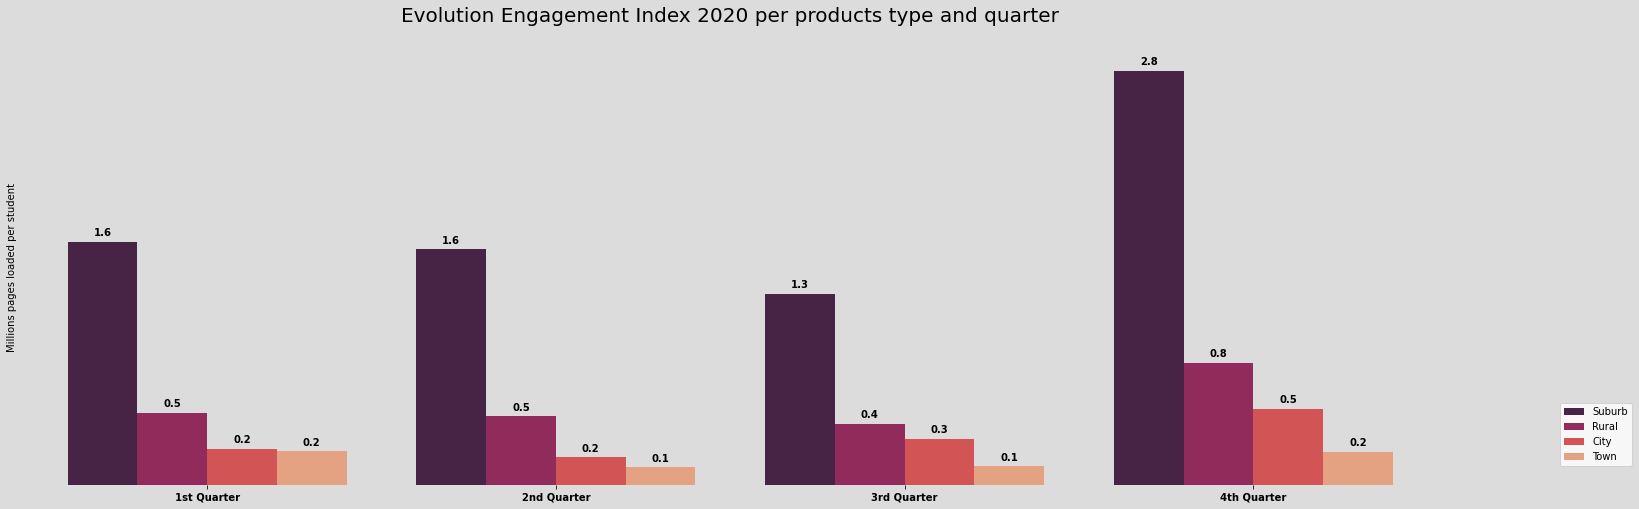

In [57]:
locale = evo_per_locale.groupby('locale')['engagement_index'].sum().sort_values(ascending=False).index

plt.figure(figsize=(25,8), facecolor='gainsboro')
test2 = sb.barplot(data=locale_quarterly_evo, x='quarter',y='engagement_index', hue='locale', order=quarter, hue_order=locale, palette="rocket")
spines_chart()
#plt.yticks([0, 1e8,2e8,3e8,4e8], ['0', '1', '2', '3', '4'], fontweight='bold')
plt.yticks([])
plt.xticks([0,1,2,3], ['1st Quarter','2nd Quarter','3rd Quarter','4th Quarter'],fontweight='bold');
plt.ylabel(('Millions pages loaded per student\n'))
plt.title('Evolution Engagement Index 2020 per products type and quarter\n', size=20)
plt.legend(bbox_to_anchor = (1.15, 0.2))
plt.gca().invert_yaxis()

for p in test2.patches:
    test2.annotate(format((p.get_height()/1e8).round(1), f'1'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)

The evolution of the Engagement Index in term of Millions pages loaded per student is logically following the same path as per product.
We see a clear evolution between the 1st and the 4th Quarter along the areas, one being more marked within the suburban area where most of our Data are coming from.
From 1.6 Millions pages loaded per student, the engagement index spiked to 2.8 Million pages loaded per student on the 4th quarter.

Interestingly and despite the summer vacation period, in the suburban area, the Million pages loaded per student remains quite hight on the 2nd and 3rd quarter.

### Engagement Index per Provider, Product types 2/3 and their Evolution

Within this area we will be interested to check on the evolution, repartition of the provider and their importance within the digital landscape.
The questions as :
- Which providers are playing a major role in 2020 ?
- How does the engagement index evolve and what are their part along the year ?
- Which products as well (another level than LC, SDO and CM) are playing an important part ? 

### Providers Overview and Share

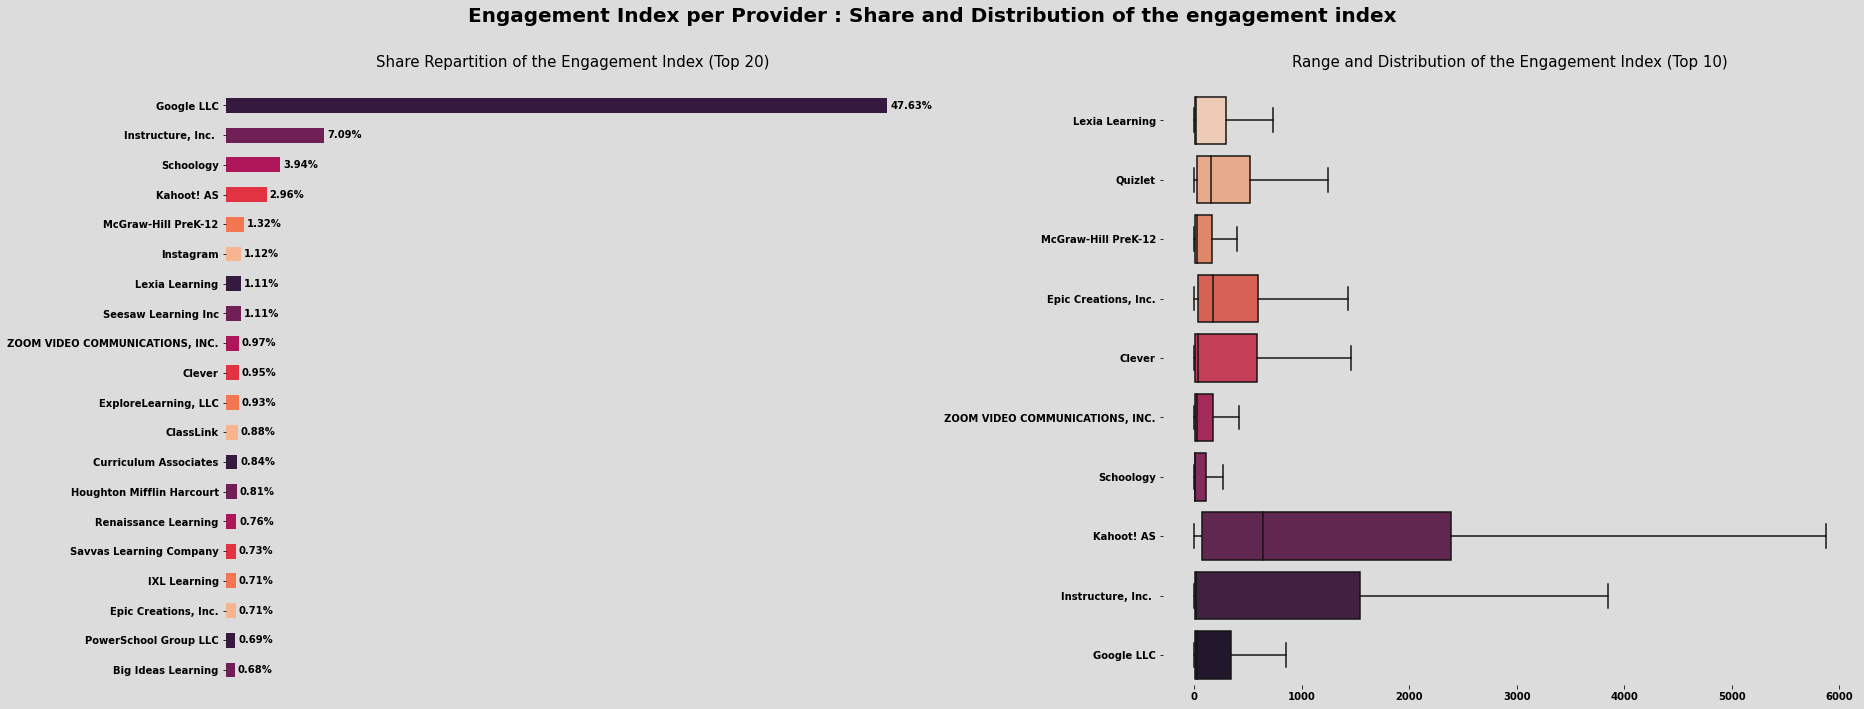

In [58]:
engagement_provider = product_engagement.groupby('Provider').sum()['percent_engagement'].sort_values(ascending=False)
color = sb.color_palette('rocket')
plt.figure(figsize=(26,10), facecolor='gainsboro')
plt.suptitle('Engagement Index per Provider : Share and Distribution of the engagement index\n', font='segoe UI', size=20, fontweight='bold')
plt.subplot(1,2,1)


engagement_provider.head(20).plot.barh(color=color)
plt.yticks(fontweight='bold')
plt.xticks([])

for i in range(20):
    count=engagement_provider[i]
    count_string = engagement_provider[i]
    plt.text(count+0.2, i, f'{count_string.round(2)}%', va='center', size=10, fontweight='bold')

plt.title('Share Repartition of the Engagement Index (Top 20)\n', size=15)
spines_chart()

plt.subplot(1,2,2)

#Create a list of Top 10 providers per engagement index
Top10_provider_engagement = district_data_clean.groupby('Provider').sum().sort_values('engagement_index', ascending=False)[0:10].index

#plot a boxplot for the top 10 providers
sb.boxplot(data= district_data_clean[district_data_clean['Provider'].isin(Top10_provider_engagement)],y= 'Provider',x='engagement_index', sym='', palette='rocket', order=Top10_provider_engagement)
spines_chart()
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('Range and Distribution of the Engagement Index (Top 10)\n', size=15);

plt.tight_layout()

The repartition of the engagement Index in term of share of Millions pages loaded show a predominance of Google LLC as main provider along the year.

Interestingly, the distribution of the Engagement Index shows a slightly different picture on which we will have a deeper look later on. 
It needs to be taken here again in consideration the potential impact of the data available from on state to the other (impact of Utah and other main states, other area impacting the result of the analyze).

We can nevertheless see that the distribution of this engagement remain compact for Google LLC showing a kind o stability whereas for Kahoot or Instructure the mean is far away from the max engagement.

in order to have a deeper understanding of this evolution we will compare these 3 Providers along the year.

### Evolution of the Engagement Index for the Provider Google LLC, Kahoot and Instructure Inc. and their Products

In [59]:
#Preparation of the data for visualization
Provider_evolution =  district_data_clean.groupby(['Provider','time']).mean()['engagement_index'].reset_index()
list_provider = ['Google LLC', 'Kahoot! AS', 'Instructure, Inc. ']

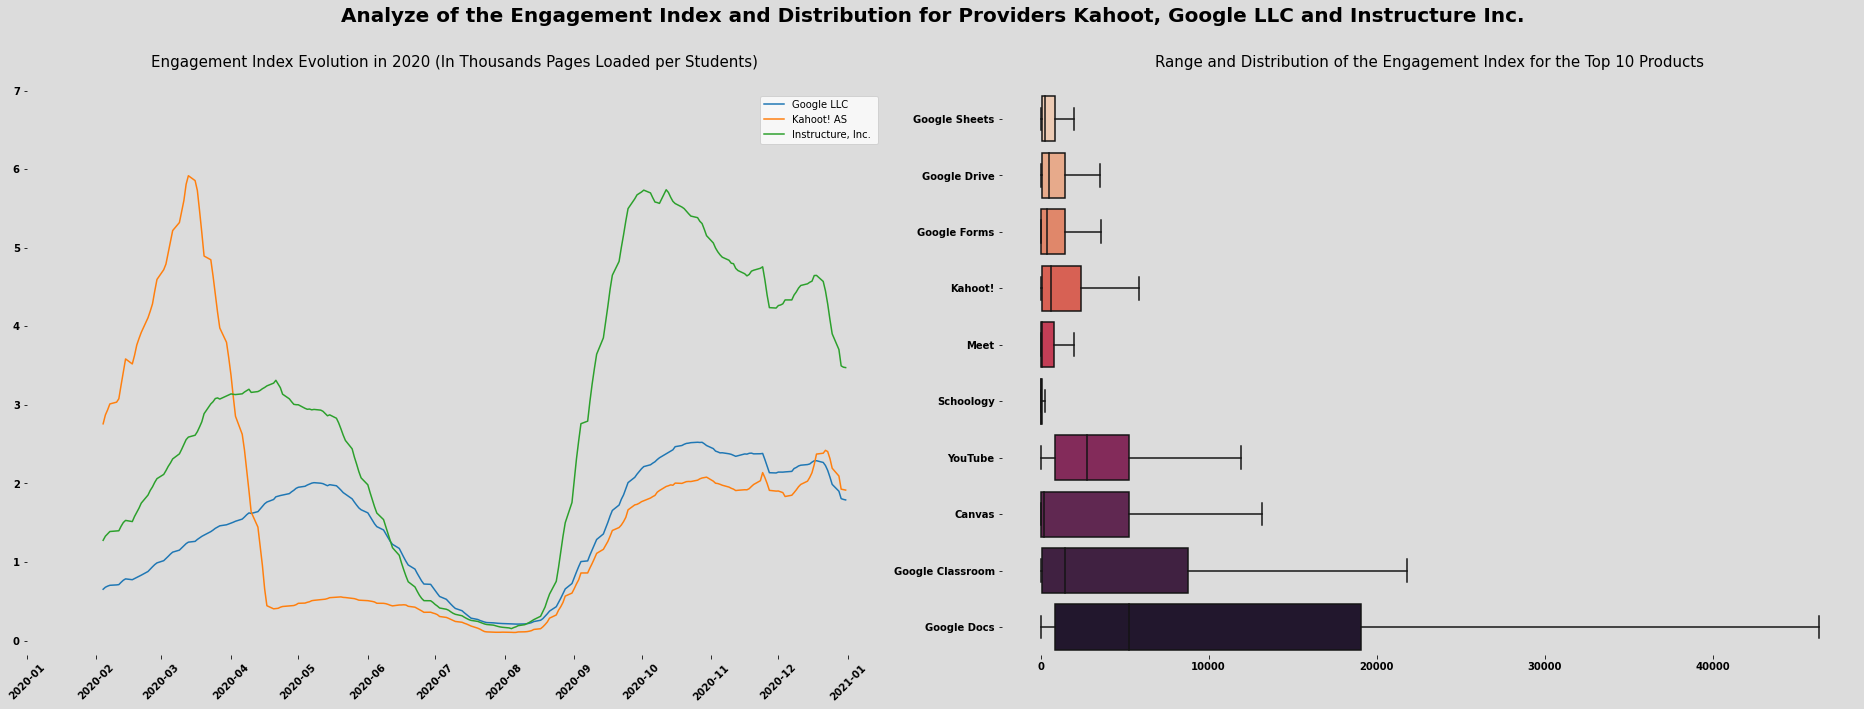

In [60]:
plt.figure(figsize=(26,10), facecolor='gainsboro')
plt.suptitle('Analyze of the Engagement Index and Distribution for Providers Kahoot, Google LLC and Instructure Inc.\n', font='segoe UI', size=20, fontweight='bold')

plt.subplot(1,2,1)

for provider in list_provider :
    plt.plot(Provider_evolution[Provider_evolution['Provider'] == provider]['time'], Provider_evolution[Provider_evolution['Provider'] == provider]['engagement_index'].rolling(window=25).mean())

plt.yticks([0, 1000,2000,3000,4000,5000,6000,7000], ['0', '1', '2', '3', '4', '5', '6', '7'], fontweight='bold')
plt.ylabel('Thousands page loaded per student\n')
plt.xticks(['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], 
           ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01'], rotation = 45, fontweight='bold');
plt.title('Engagement Index Evolution in 2020 (In Thousands Pages Loaded per Students)\n', size=15)
plt.legend(list_provider)

spines_chart()
plt.gca().invert_yaxis()

plt.subplot(1,2,2)

#Create a list of Top 10 Products per engagement index
Top10_product_engagement = district_data_clean.groupby('Product Name').mean().sort_values('engagement_index', ascending=False)[0:10].index

#plot a boxplot for the top 10 providers
sb.boxplot(data= district_data_clean[district_data_clean['Product Name'].isin(Top10_product_engagement)],y= 'Product Name',x='engagement_index', sym='', palette='rocket', order=Top10_product_engagement)
spines_chart()
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('Range and Distribution of the Engagement Index for the Top 10 Products\n', size=15);

plt.tight_layout()

The inspection of a 25 days rolling average of the engagement index shows that product provided Google LLC are less performing that Kahoot and Instructure Inc depending as well of the quarter impacted.

We need to keep in mind that districts importance (Utah = 29 Districts) is negatively impacting this analyze and shows its limits.
Nevertheless, after inspection we see as well a clear drop of the utilization of Kahoot in favor to Instructure Inc products.
Both Kahoot and Instructure are proposing the same kind of services/Products, as well, Instructure is a Utah based company. Without further investigation in this area and in pure speculation in the analyze of the Data, we could imagine a shift of recommended provider in 2020 in Utah and other states from Kahoot to Instructure.

Going back on the total engagement index per products proposed by these 3 Providers, we see a clear dominance of Google for 2020 with multiple products (Google Docs, Google Classroom, Drive, Forms...)

__Products Engagement repartition of the Engagement Index__

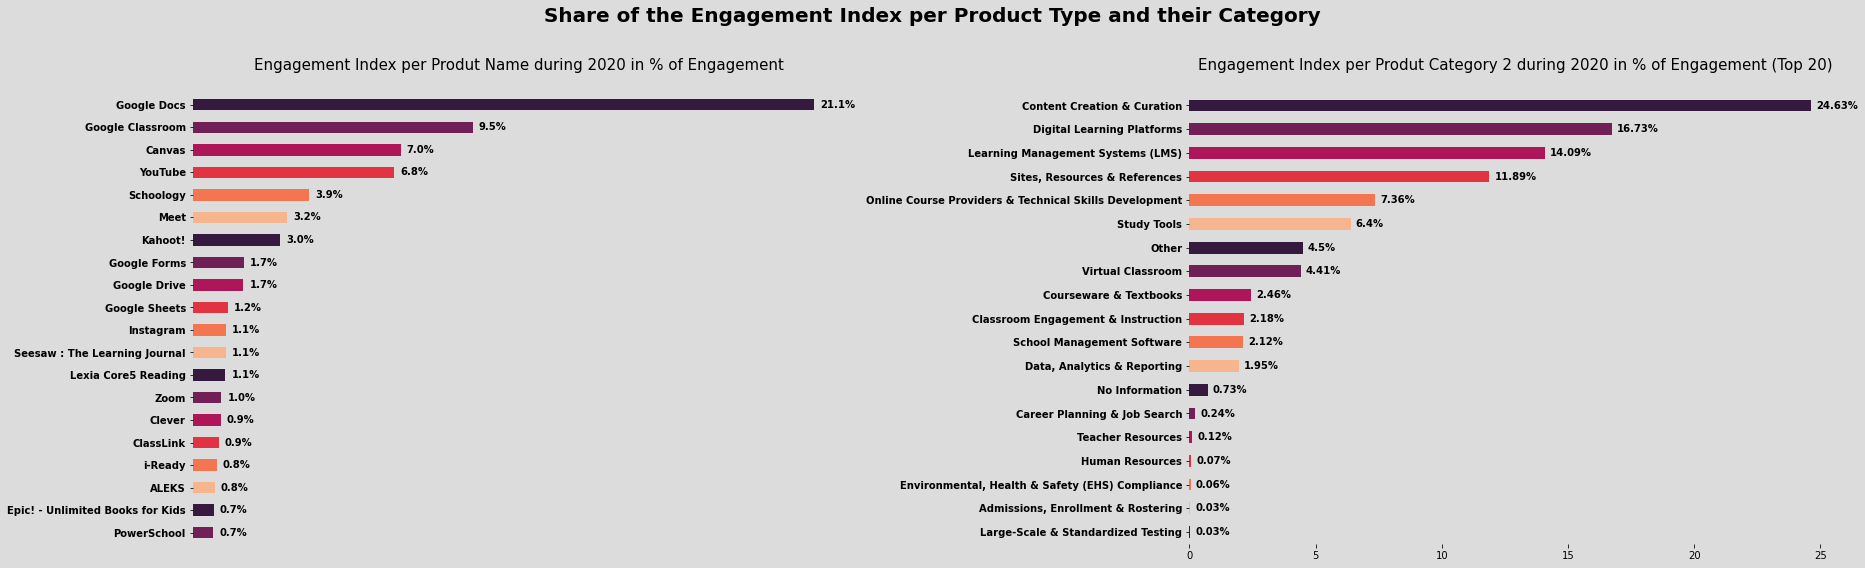

In [61]:
plt.figure(figsize=(26,8), facecolor='gainsboro')
plt.suptitle('Share of the Engagement Index per Product Type and their Category\n', font='segoe UI', size=20, fontweight='bold')
plt.subplot(1,2,1)

#ploting by Product Name
engagement_Product = product_engagement.groupby('Product Name').sum()['percent_engagement'].sort_values(ascending=False)
color = sb.color_palette('rocket')


engagement_Product.head(20).plot.barh(color=color)

for i in range(20):
    count=engagement_Product[i]
    count_string = engagement_Product[i]
    plt.text(count+0.2, i, f'{count_string.round(1)}%', va='center', size=10, fontweight='bold')
    
plt.yticks(fontweight='bold')
plt.xticks([])
plt.title('Engagement Index per Produt Name during 2020 in % of Engagement\n', size=15)

spines_chart()

plt.subplot(1,2,2)

engagement_cat2 = product_engagement.groupby('Product_cat2').sum()['percent_engagement'].sort_values(ascending=False)

engagement_cat2.head(20).plot.barh(color=color)

for j in range(19):
    count1=engagement_cat2[j]
    count_string1 = engagement_cat2[j]
    plt.text(count1+0.2, j, f'{count_string1.round(2)}%', va='center', size=10, fontweight='bold')
    
plt.yticks(fontweight='bold')
plt.title('Engagement Index per Produt Category 2 during 2020 in % of Engagement (Top 20)\n', size=15)

spines_chart()
plt.tight_layout()

<a id='study'></a>
## Study of the sociologic, economic and localization environment impact on the Engagement Index 

### Overall Correlation Heatmap of our data

In [62]:
#Merge average data of district information with average engangement index per state and locale
district_mean = districts_info.groupby(['state','locale']).mean().reset_index()
district_mean = district_mean.merge(district_data_clean.groupby(['state','locale'])['engagement_index'].mean(), on=['state','locale'])

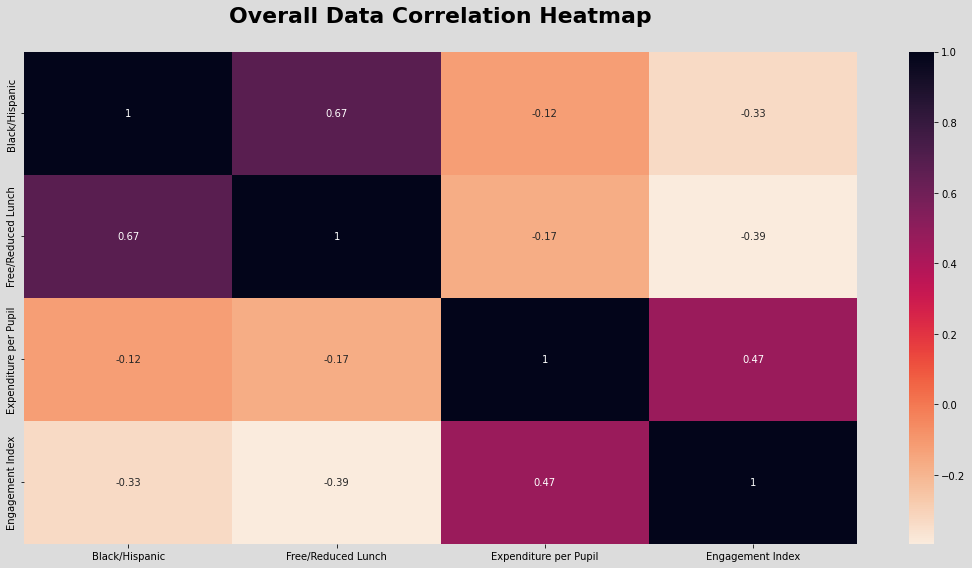

In [63]:
#Plotting heatmap
y_label = ['Black/Hispanic', 'Free/Reduced Lunch', 'Expenditure per Pupil','Engagement Index']

plt.figure(figsize=(15,8), facecolor='gainsboro')
plt.title('Overall Data Correlation Heatmap\n', size=22, fontweight='bold')
sb.heatmap(district_mean[['pct_black/hispanic','pct_free/reduced','pp_total_raw','engagement_index']].corr(), cmap='rocket_r', annot=True,
          yticklabels=y_label, xticklabels=y_label);

plt.tight_layout()

The correlation heatmap reveals the following :
- There is a negative correlation between the engagement index and the share in the population of Black/Hispanic pupils
- There is as well a negative correlation between the engagement index and the right to Free and reduced lunch
- We see as well a high correlation between pupils being Black/Hispanic and having access to Free and reduced lunch
- And as well the higher the expenditure per pupil is, the higher the engagement is.

### Correlation Heat-Map per locality

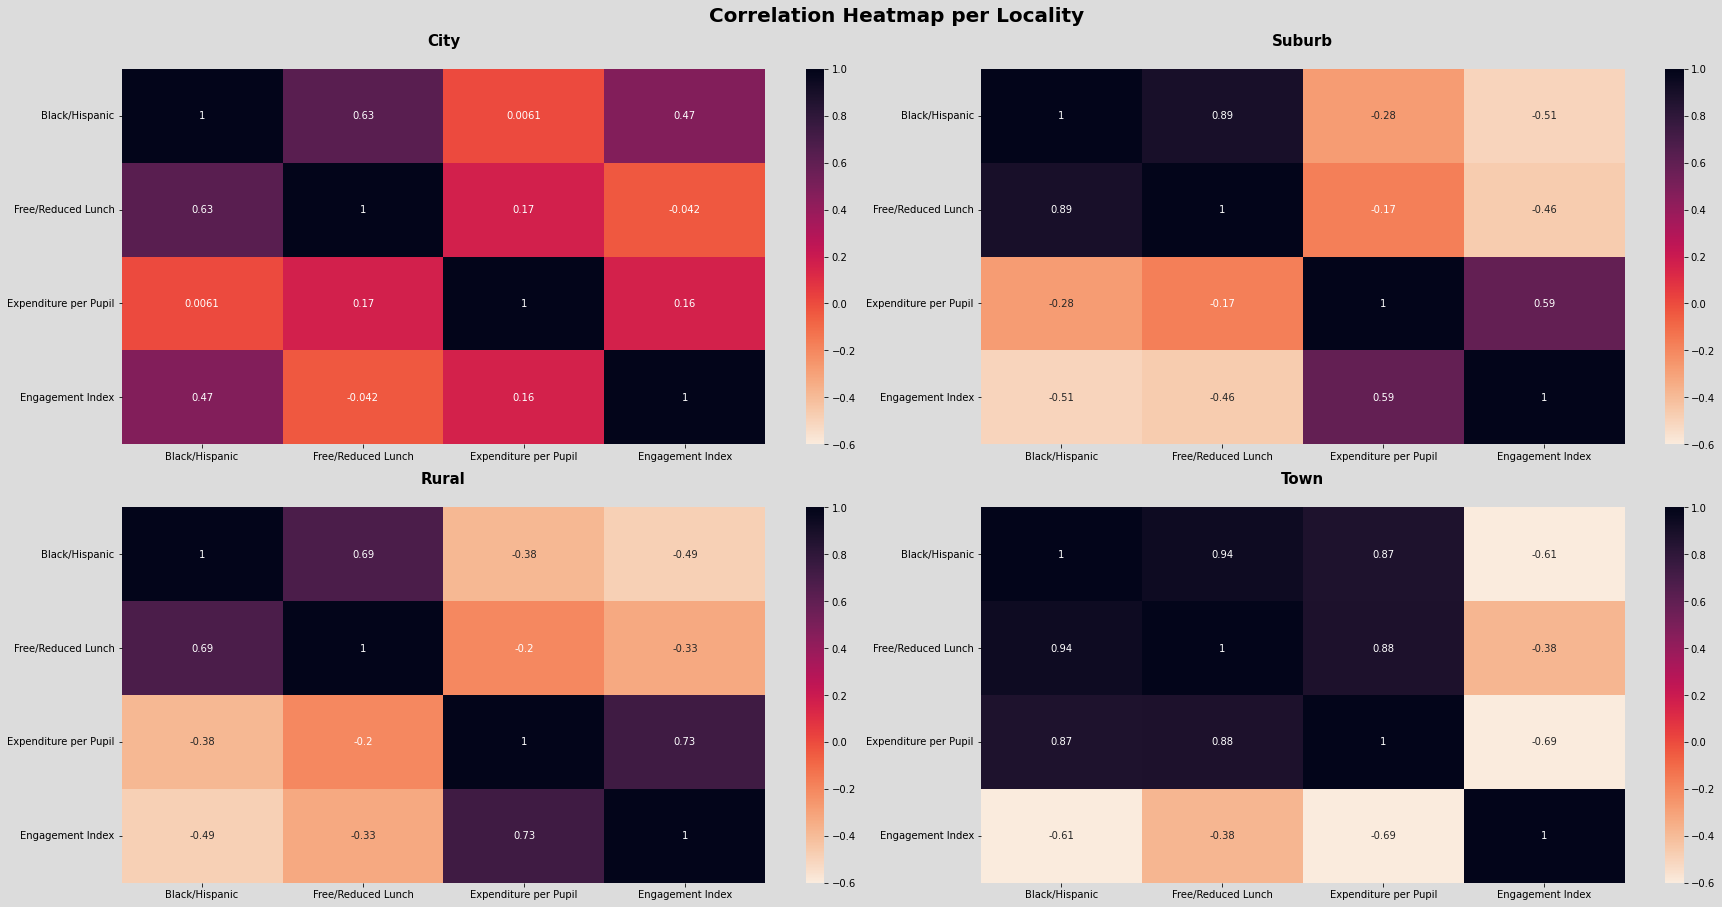

In [64]:
#Create a list of locale (e.g City, Suburb...)
locale_type = district_mean['locale'].unique()
#Define the basic start of the axe
add_axe2 = 1
plt.figure(figsize=(25,25), facecolor='gainsboro')
plt.suptitle('Correlation Heatmap per Locality\n', size=20, fontweight='bold')

#plot an heatmap for each locale in locale_type
for locale in locale_type:
    plt.subplot(4,2,add_axe2)
    heat = district_mean[district_mean['locale']==locale]
    sb.heatmap(heat[['pct_black/hispanic','pct_free/reduced','pp_total_raw','engagement_index']].corr(), cmap='rocket_r', annot=True, vmin=-0.6, vmax=1,
              yticklabels=y_label, xticklabels=y_label)
    plt.title(f'{locale}\n', fontweight='bold', size=15)
    plt.tight_layout()
    add_axe2 = add_axe2+1

plt.tight_layout()

The correlation heatmap per geographical localization of the district is as well showing interesting information.
All proportion kept, we need to take these details with precaution but the data displayed an unequal situation according to where the pupils are studying or where the district is located.

The differences as well in term of social intervention per state is as well to take into consideration, but from one locality to the other we observe an higher impact of the ethnicity and access to social support on the Engagement Index.

For district located in town and suburb we see an higher correlation than on the overall picture in term of Black/Hispanic population, access of free/reduced lunch and engagement index.
The negative correlation being higher than the overall picture and the other localities.

For the suburban area, for which most of districts are located, we observe an high correlation between ethnicity and Social support (free/reduced lunch).
As well the negative correlation observed on the Engagement Index for Black/Hispanic population and social support is confirmed.


### Engagement Index Comparative Study of District according to the child Ethnicity

On this part of the analyze, we will have a view more deeply on the impact of Ethnicity on the Engagement index.

In order to conduct this study, we will separate our Dataset in 2 areas. One being the District for which the percentage of the population being Black/Hispanic is below the average of all districts and the other one above the average of all districts.

We should then be able to have a clearer picture on the impact on the Engagement Index. 

In [65]:
#district_data_clean.groupby(['state','locale']).mean()['engagement_index'].reset_index()
#district_mean = district_mean.merge(district_data_clean.groupby(['state','locale']).mean()['engagement_index'].reset_index(), on=['state','locale'])
pct_black_below_mean = district_mean[district_mean['pct_black/hispanic'] >= district_mean['pct_black/hispanic'].mean()]
pct_black_above_mean = district_mean[district_mean['pct_black/hispanic'] < district_mean['pct_black/hispanic'].mean()]

### Correlation Heatmap of 2 groups according to the ethnicity situation

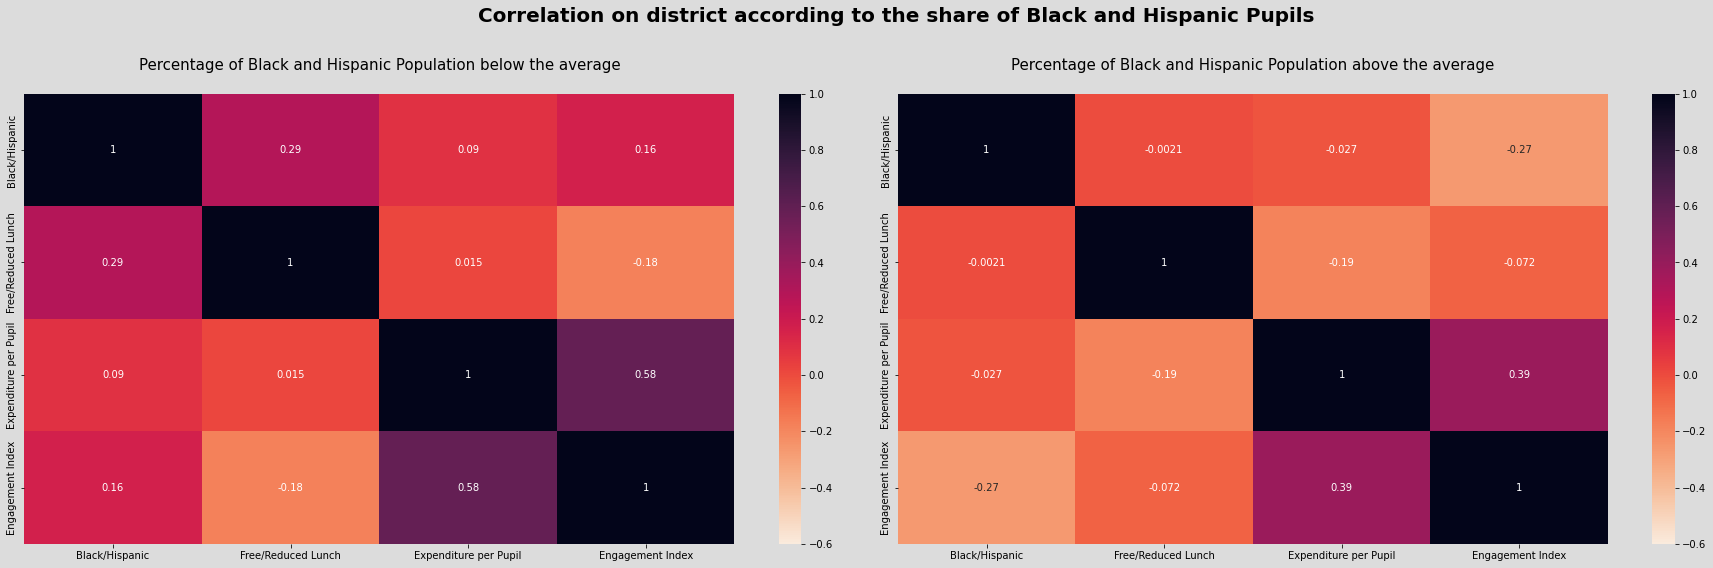

In [66]:
#ploting visualization heatmap

plt.figure(figsize=(25,8), facecolor='gainsboro')
plt.suptitle('Correlation on district according to the share of Black and Hispanic Pupils\n', size=20, fontweight='bold')
plt.subplot(1,2,1)
sb.heatmap(pct_black_below_mean[['pct_black/hispanic','pct_free/reduced','pp_total_raw','engagement_index']].corr(), cmap='rocket_r', annot=True, vmin=-0.6, vmax=1, yticklabels=y_label, xticklabels=y_label)
plt.title('Percentage of Black and Hispanic Population below the average\n', size=15)
plt.subplot(1,2,2)
sb.heatmap(pct_black_above_mean[['pct_black/hispanic','pct_free/reduced','pp_total_raw','engagement_index']].corr(), cmap='rocket_r', annot=True, vmin=-0.6, vmax=1, yticklabels=y_label, xticklabels=y_label)
plt.title('Percentage of Black and Hispanic Population above the average\n', size=15)
plt.tight_layout()

As the situation is more diffuse as well as the number of districts more divided between the 2 groups, even if we still observe a negative correlation between being part of the Black/Hispanic population and the engagement index, this correlation is less important than the one observed previously on the correlation analyze per locality.

Nevertheless this correlation exist with an impact wtil around 0.27 on 1.

### Analyze of the Engagement Index Distribution in term of ethnicity

As a follow-up analyze, and still for the 2 main group defined of district, we will have a look now on the engagement index and its distribution.

Goal being to check the advantage and disadvantage in this area in term of being from one group or the other.

In [67]:
#Introduce categorization of population in DataFrame
district_mean['mean_situation'] = ['Below Average' if v < district_mean['pct_black/hispanic'].mean() else 'Above Average' for v in district_mean['pct_black/hispanic']]

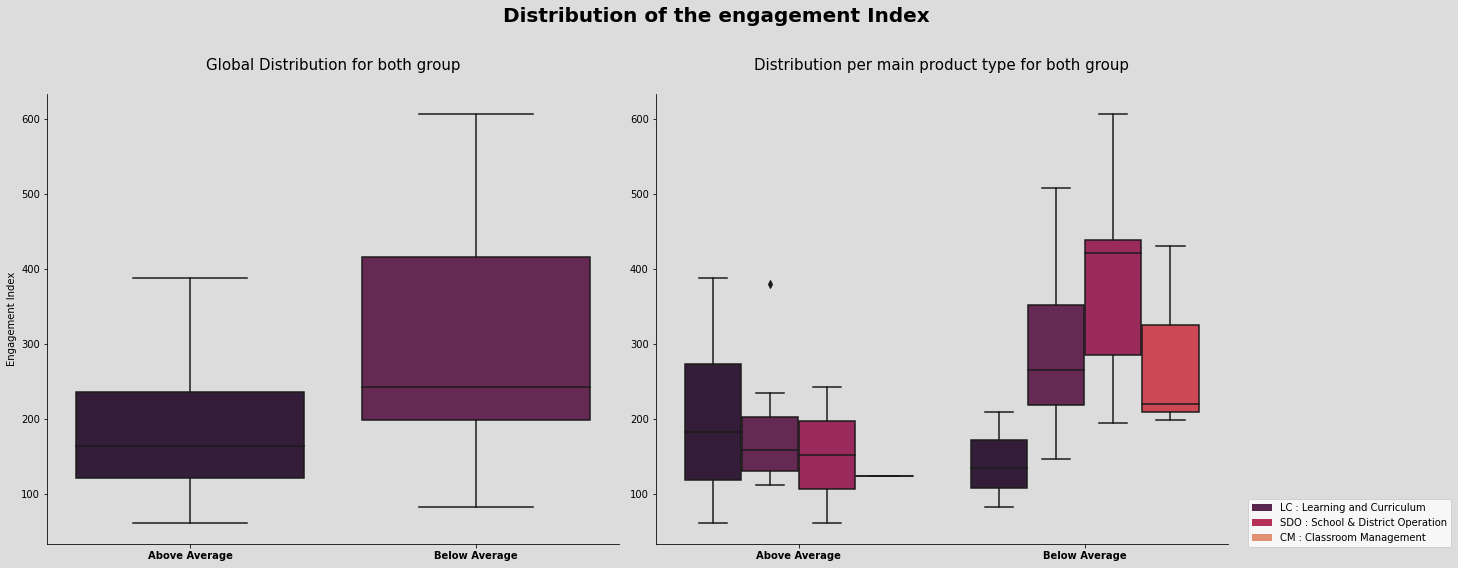

In [68]:
#Plot the boxplot of the distribtion betwen above and below average
plt.figure(figsize=(20,8), facecolor='gainsboro')
plt.suptitle('Distribution of the engagement Index\n', size=20, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Global Distribution for both group\n', size=15)
sb.boxplot(data=district_mean, x='mean_situation', y='engagement_index', palette=color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().set_facecolor('gainsboro')
plt.xticks(fontweight='bold')
plt.xlabel("")
plt.ylabel('Engagement Index')


plt.subplot(1,2,2)
plt.title('Distribution per main product type for both group\n', size=15)
sb.boxplot(data=district_mean, x='mean_situation', y='engagement_index', hue='locale', palette=color)
plt.xticks(fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().set_facecolor('gainsboro')
plt.xticks(fontweight='bold')
plt.xlabel("")
plt.ylabel('')
plt.legend(h, labels, bbox_to_anchor = (1.4, 0.11))


plt.tight_layout()

On the previous correlation representation, we had a view on the negative correlation between being part of the group with an higher percentage of Black/Hispanic population.

The representation now on the 2 groups and the distribution of the Engagement Index clearly shows this impact.

The group where the percentage of Black/Hispanic population is above the average as clearly a lower engagement index, the average being far below the upper quartil. 
On the other way around, the second group averaged engagement index is higher than the higher quartil of the boxplot displayed.

The same is to observe on the distribution per group and Product type.

It clearly shows the higher chance of one group on the other.

### Averaged Engagement Index per locality according to Ethnic Appartenance

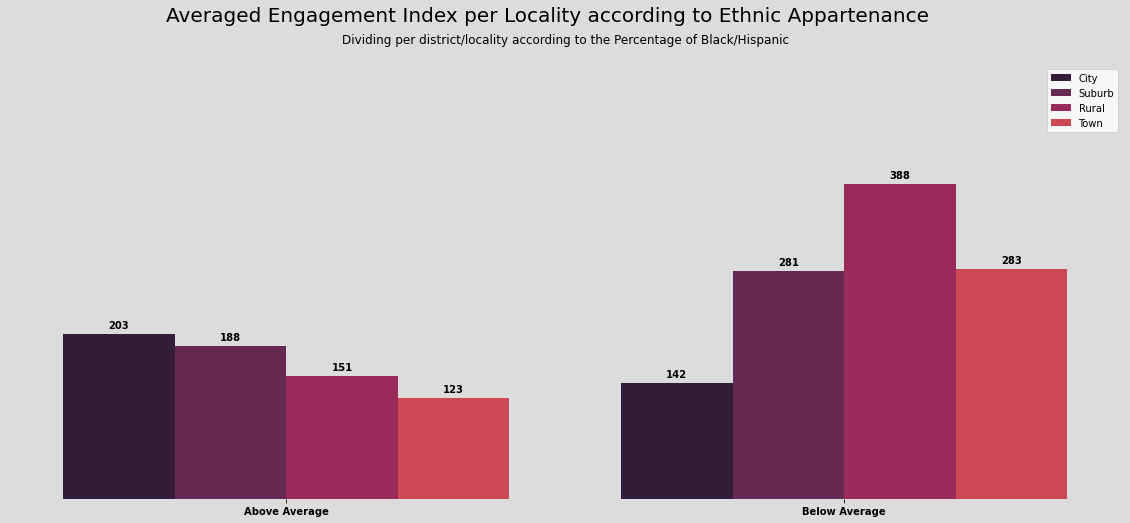

In [69]:
plt.figure(figsize=(20,8), facecolor='gainsboro')
distri = sb.barplot(data=district_mean, x='mean_situation', y='engagement_index', hue='locale', palette=color, errwidth=0)
plt.xticks(fontweight='bold')
plt.legend()
for p in distri.patches:
    distri.annotate(format((p.get_height()).astype(int)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontweight='bold', size=10)
plt.yticks([])
spines_chart()
plt.gca().invert_yaxis()
plt.suptitle('Averaged Engagement Index per Locality according to Ethnic Appartenance\n', size=20)
plt.title('Dividing per district/locality according to the Percentage of Black/Hispanic\n');

<a id='conclusions'></a>
# Conclusion

During the first part of this analyze, we identified the potential biase which still need to be taken into consideration for our conclusion. 
In order not to forget it, we need to remind that :
- The district repartition between the different state is having an impact on the conclusion (more data available for some states than the other=
- The legal framework in term of education might be different from one state to the other within the Federation

The pandemic which started in 2020 had a major impact in term of digitalization of the educational system for the district and states for which we were able to analyze the data.

It has certainly been as well a chance for key actors/providers in the market in term of share but foremost shows a predominance of Google LLC in term of share of the percentage of the overall engagement index during the year 2020 but as well in term of number of products available or made available by the brand, Google proposing a large bandwidth of product covering different possibility of digital learning as well as management.

An interesting situation has been as well observed, which we didn't digged much more, the apparent fight between 2 main actors as well in the area being Kahoot and Instructure Inc.
Kahoot being preferred at the beginning of the pandemic and been replaced later on by Instructure Inc (again a Utah based company which might have been supported by the state as best local solution : Pure speculation).

All in all, the engagement index evolve during 2020 tremendously and reached a pick within the second part of the year. 
Even if a spike is visible during the 1st quarter, the summer vacation but as well as the decrease of Covid case shows the different during the last part of the year reaching for the main area of Educational software a difference about +424% of the engagement index.

We could as well explained this situation by a start in the pandemic with infrastructure as well as system not prepare to face such a situation to a system and educational system aware of the potential necessity of going back to home schooling and prepared for this situation once the summer vacation was over.

__The impact of the ethnicity and social support on the engagement index__

In the last part of the analyze we show the negative correlation on the engagement index according to the ethnicity. Not a surprise but more a confirmation as it highlight the difference in term of change of access to the education's right within the different area of the population.

Ethnic minority as well as population where the social class is lower than other, is having less change to have a cheap access to the internet or a better access to an high standing education possibility.
Discrepancy within the 2 groups analyzed show at the end and confirm this 2 class society which the pupil of the US educational system have to face.
